# "parts of form" explorer
# developed by Kow Kuroda (kow.kuroda@gmail.com)
# History
2024/09/13 Created

In [100]:
#!pip install -U pyLDAvis
#!pip install -U pandas

In [101]:
## imports
import os, sys
import pprint as pp
import unicodedata

In [102]:
## 一つ上の階層のファイルを見るように設定
sys.path.append(os.path.join(os.path.dirname("__file__"), '..'))

In [103]:
## Cython module の生成 (必要に応じて)
#!python clean setup.py build_ext --inplace

In [104]:
## Cython を使うかどうか
use_Cython = False
if use_Cython:
    %load_ext Cython

In [105]:
# frequency rank range for terms to show
highest_freq_rank_for_terms_to_show = 100
lowest_freq_rank_for_terms_to_show  = 300
rank_range  = (highest_freq_rank_for_terms_to_show, lowest_freq_rank_for_terms_to_show)
print(f"rank_range: {rank_range}")

rank_range: (100, 300)


In [106]:
## term settings
term_classes        = [ 'spell', 'sound' ]
term_class          = term_classes[1]
ngram_is_inclusive  = True
inclusion_degree    = None

## doc settings
max_doc_size        = 11
min_doc_size        =  3
print(f"max_doc_size: {max_doc_size}")
print(f"min_doc_size: {min_doc_size}")

### boundary handling
mark_boundaries     = True
boundary_mark       = "#"

## term setting
term_is_skippy      = False
gap_mark            = "…"
seg_joint           = ""

### accent handling
suppress_accents    = True
accent_marks        = [ "ˈ", "ˌ" ] 
if term_class == 'sound':
    if suppress_accents:
        accent_status = "-unaccented"
    else:
        accent_stratus = "-accented"
else:
    accent_status = ""
print(f"accent_status: {accent_status}")

max_doc_size: 11
min_doc_size: 3
accent_status: -unaccented


In [107]:
## settings for language
## a key must be part of a file name 
target_lang_dict = {    'en_US' : 'English (US)',
                        'en_UK' : 'English (UK)',
                        'en_N_only' : 'English noun (WN)',
                        'en_V_only' : 'English verb (WN)',
                        'en_A_only' : 'English adj (WN)',
                        'en_R_only' : 'English adv (WN)',
                        'ar'    : 'Arabic',
                        'de'    : 'German',
                        'de_N_only' : 'German noun',
                        'de_non_N_only' : 'German non-noun',
                        'eo'    : 'Esperanto',
                        'es_ES' : 'Spanish (Spain)',
                        'es_MX' : 'Spanish (Mexico)',
                        'fi'    : 'Finnish',
                        'fr_FR' : 'French (France)',
                        'fr_QC' : 'French (Quebec)',
                        'is'    : 'Icelandic',
                        'ir'    : 'Irish',
                        'nl'    : 'Dutch',
                        'ro'    : 'Romanian',
                        'sw'    : 'Swahili' }
## proper language selection
target_lang_keys = [    'en_US', # 0
                        'en_UK', # 1
                        'en_N_only', # 2
                        'en_V_only', # 3
                        'en_A_only', # 4
                        'en_R_only', # 5
                        'ar', # 6
                        'de', # 7
                        'de_N_only', # 8
                        'de_non_N_only', # 9
                        'eo', 'es_ES', 'es_MX',
                        'fi', 'fr_FR', 'fr_QC',
                        'is', 'nl', 'ro', 'sw',
                        'ir' # This lacks sound
                    ]
## check
target_lang_key  = target_lang_keys[8]
print(f"target_lang_key: {target_lang_key}")
lang_name = target_lang_dict[target_lang_key]
print(f"target lang: {lang_name} [{target_lang_key}]")

## target_attr [effective only for Irish]
target_class = ""

#target_class = None # This causes an unrediable error
if target_lang_key == "ir":
    target_classes = [ 'adjectives', 'nouns', 'verbs' ]
    target_class = f"-{target_classes[3]}"
print(f"target_class: {target_class}")

target_lang_key: de_N_only
target lang: German noun [de_N_only]
target_class: 


In [108]:
## sampling
source_sampling          = True
source_sampling_rate     = 0.5
source_sampling_max_size = 5000
second_sampling          = False
second_sampling_rate     = 0.7

In [109]:
## set target files
import glob
data_dir1      = "data/open-dict-ipa/data1"
data_dir2      = "data/open-dict-ipa/data1a"
data_dir3      = "data/wn3"
data_dir4      = "data/irish"
target_files   = glob.glob(f"{data_dir1}/*")
target_files2  = glob.glob(f"{data_dir2}/*")
target_files.extend(target_files2)
target_files3  = glob.glob(f"{data_dir3}/*")
target_files.extend(target_files3)
target_files4  = glob.glob(f"{data_dir4}/*")
target_files.extend(target_files4)
#
target_files = sorted([ file for file in target_files if ".csv" in file ])
pp.pprint(target_files)

['data/irish/word-irish-adjectives-spell.csv',
 'data/irish/word-irish-noun-phrases-spell.csv',
 'data/irish/word-irish-nouns-spell.csv',
 'data/irish/word-irish-possessives-spell.csv',
 'data/irish/word-irish-prepositions-spell.csv',
 'data/irish/word-irish-verbs-spell.csv',
 'data/open-dict-ipa/data1/ar.csv.gz',
 'data/open-dict-ipa/data1/de.csv.gz',
 'data/open-dict-ipa/data1/en_UK.csv.gz',
 'data/open-dict-ipa/data1/en_US.csv.gz',
 'data/open-dict-ipa/data1/eo.csv.gz',
 'data/open-dict-ipa/data1/es_ES.csv.gz',
 'data/open-dict-ipa/data1/es_MX.csv.gz',
 'data/open-dict-ipa/data1/fa.csv.gz',
 'data/open-dict-ipa/data1/fi.csv.gz',
 'data/open-dict-ipa/data1/fr_FR.csv.gz',
 'data/open-dict-ipa/data1/fr_QC.csv.gz',
 'data/open-dict-ipa/data1/is.csv.gz',
 'data/open-dict-ipa/data1/ja.csv.gz',
 'data/open-dict-ipa/data1/jam.csv.gz',
 'data/open-dict-ipa/data1/ma.csv.gz',
 'data/open-dict-ipa/data1/nb.csv.gz',
 'data/open-dict-ipa/data1/nl.csv.gz',
 'data/open-dict-ipa/data1/or.csv.gz',
 '

In [110]:
## get source data from files
import pandas as pd
import gzip
#target_language_key = "en_US" # can be changed to get other languages
#if target_class != "" or target_class is not None:
if target_class != "":
    target_file = [ f for f in target_files if target_lang_key in f and target_class in f ][0]
else:
    target_file = [ f for f in target_files if target_lang_key in f ][0]
print(f"processing: {target_file}")
##
if target_lang_key == "ir":
    col_names = ['spell', 'POS']
else:
    col_names = ['spell', 'sound']

##
if target_file.endswith(".gz"):
    with gzip.open(target_file, "rt") as f:
        raw_df = pd.read_csv(f, encoding = 'utf8', header = None, names = col_names )
else:
    with open(target_file, "rt") as f:
        raw_df = pd.read_csv(f, encoding = 'utf8', header = None, names = col_names )

## normalize characters
raw_df['spell'] = raw_df['spell'].apply(lambda x: unicodedata.normalize('NFC', str(x)))

## modify sound
try:
    sounds = raw_df['sound'].apply(lambda x: x.strip('/') )
    sounds = [ x.split("/,")[0] for x in sounds ] # picks up only the first of multiple entries
    raw_df['sound'] = sounds
except (AttributeError, KeyError):
    pass
#
raw_df.sample(10)

processing: data/open-dict-ipa/data1a/de_N_only.csv.gz


,spell,sound
20166,Elsass,ˈɛlzas
78647,Tummelplätzen,ˈtʊmmɛlplɛtsən
23179,Fahrschülerinnen,ˈfɑɾʃyleɾɪnnən
77450,Tollpatschen,ˈtɔllpaʧən
61519,Rechnungsform,ˈɾɛçnʊŋsfɔɾm
53451,Nachbarschaft,ˈnaxba(ːɐ̯)ʃaft
15094,Damendoppel,daˈmɛndɔppel
81124,Verbindungskanten,fɛːɐ̯bɪndʊŋsˈkɑntən
440,Abkopplung,ˈʔapˌkɔpplʊŋ
35855,Hergang,ˈheːɐ̯ˌgaŋ


In [111]:
## source sampling
len(raw_df)
if source_sampling:
	print(f"source sampling applied")
	if len(raw_df) >= source_sampling_max_size:
		raw_df = raw_df.sample(source_sampling_max_size)
	else:
		raw_df = raw_df.sample(round(len(raw_df) * source_sampling_rate))
## remove accent marking
if suppress_accents:
	try:
		raw_df['sound'] = raw_df['sound'].apply(lambda x: "".join([ y for y in list(x) if y not in accent_marks ]))
	except KeyError:
		pass
## add boudary marks
if mark_boundaries:
	raw_df['spell'] = raw_df['spell'].apply(lambda x: f"{boundary_mark}{x}{boundary_mark}")
	try:
		raw_df['sound'] = raw_df['sound'].apply(lambda x: f"{boundary_mark}{x}{boundary_mark}")
	except KeyError:
		pass
#
print(raw_df)

source sampling applied
                    spell               sound
847     #Abschlussarbeit#   #ʔapʃlʊszaɾbəiːt#
83343   #Viertklässlerin#   #viːɾtklɛsslɐ̯ɪn#
86226   #Weichenstellern#    #vaeçɛnstɛllɛɾn#
89977        #Zierfische#         #tsiːɾfɪʃə#
35395            #Hecken#             #hɛkən#
...                   ...                 ...
86442         #Weinstock#          #vaenstɔk#
67458        #Schurwolle#          #ʃʊɾvɔllə#
38363       #Innenräumen#      #ʔɪnnɛnɾɔømən#
80449  #Unterrichtsräume#  #ʔʊntɛɾɾɪçtsɾɔømə#
7422         #Austritten#        #ʔaostɾɪtən#

[5000 rows x 2 columns]


In [112]:
## generate 1-grams for spell and sound
## spell
raw_df['sp_1gram'] = raw_df['spell'].apply(lambda x: list(str(x)))
# add column of size
raw_df['sp_size'] = raw_df['sp_1gram'].apply(lambda x: len(x))
# add column of count of '-' inside
raw_df['hyphen'] = raw_df['sp_1gram'].apply(lambda x: list(x).count("-"))
# add column of count of '.' inside
raw_df['period'] = raw_df['sp_1gram'].apply(lambda x: list(x).count("."))
## sound
# takes the first entry, removes '/' around
try:
    raw_df['sn_1gram'] = raw_df['sound'].apply(lambda x: list(x) )
except (TypeError, KeyError):
    pass
# add column of size
try:
    raw_df['sn_size'] = raw_df['sn_1gram'].apply(lambda x: len(x))
except KeyError:
    pass
## check
raw_df

,spell,sound,sp_1gram,sp_size,hyphen,period,sn_1gram,sn_size
847,#Abschlussarbeit#,#ʔapʃlʊszaɾbəiːt#,"[#, A, b, s, c, h, l, u, s, s, a, r, b, e, i, ...",17,0,0,"[#, ʔ, a, p, ʃ, l, ʊ, s, z, a, ɾ, b, ə, i, ː, ...",17
83343,#Viertklässlerin#,#viːɾtklɛsslɐ̯ɪn#,"[#, V, i, e, r, t, k, l, ä, s, s, l, e, r, i, ...",17,0,0,"[#, v, i, ː, ɾ, t, k, l, ɛ, s, s, l, ɐ, ̯, ɪ, ...",17
86226,#Weichenstellern#,#vaeçɛnstɛllɛɾn#,"[#, W, e, i, c, h, e, n, s, t, e, l, l, e, r, ...",17,0,0,"[#, v, a, e, ç, ɛ, n, s, t, ɛ, l, l, ɛ, ɾ, n, #]",16
89977,#Zierfische#,#tsiːɾfɪʃə#,"[#, Z, i, e, r, f, i, s, c, h, e, #]",12,0,0,"[#, t, s, i, ː, ɾ, f, ɪ, ʃ, ə, #]",11
35395,#Hecken#,#hɛkən#,"[#, H, e, c, k, e, n, #]",8,0,0,"[#, h, ɛ, k, ə, n, #]",7
...,...,...,...,...,...,...,...,...
86442,#Weinstock#,#vaenstɔk#,"[#, W, e, i, n, s, t, o, c, k, #]",11,0,0,"[#, v, a, e, n, s, t, ɔ, k, #]",10
67458,#Schurwolle#,#ʃʊɾvɔllə#,"[#, S, c, h, u, r, w, o, l, l, e, #]",12,0,0,"[#, ʃ, ʊ, ɾ, v, ɔ, l, l, ə, #]",10
38363,#Innenräumen#,#ʔɪnnɛnɾɔømən#,"[#, I, n, n, e, n, r, ä, u, m, e, n, #]",13,0,0,"[#, ʔ, ɪ, n, n, ɛ, n, ɾ, ɔ, ø, m, ə, n, #]",14
80449,#Unterrichtsräume#,#ʔʊntɛɾɾɪçtsɾɔømə#,"[#, U, n, t, e, r, r, i, c, h, t, s, r, ä, u, ...",18,0,0,"[#, ʔ, ʊ, n, t, ɛ, ɾ, ɾ, ɪ, ç, t, s, ɾ, ɔ, ø, ...",18


In [113]:
## filtering raw_data by size
print(f"term_class: {term_class}")
if "spell" in term_class:
    df_filtered = raw_df[ (raw_df['sp_size'] <= max_doc_size) & (raw_df['sp_size'] >= min_doc_size) & (raw_df['hyphen'] == 0) & (raw_df['period'] == 0) ]
else:
    df_filtered = raw_df[ (raw_df['sn_size'] <= max_doc_size) & (raw_df['sn_size'] >= min_doc_size) ]
#
df_filtered

term_class: sound


,spell,sound,sp_1gram,sp_size,hyphen,period,sn_1gram,sn_size
89977,#Zierfische#,#tsiːɾfɪʃə#,"[#, Z, i, e, r, f, i, s, c, h, e, #]",12,0,0,"[#, t, s, i, ː, ɾ, f, ɪ, ʃ, ə, #]",11
35395,#Hecken#,#hɛkən#,"[#, H, e, c, k, e, n, #]",8,0,0,"[#, h, ɛ, k, ə, n, #]",7
51101,#Messbrücke#,#mɛszbrʏkə#,"[#, M, e, s, s, b, r, ü, c, k, e, #]",12,0,0,"[#, m, ɛ, s, z, b, r, ʏ, k, ə, #]",11
11932,#Bittbriefe#,#bɪtbriːfə#,"[#, B, i, t, t, b, r, i, e, f, e, #]",12,0,0,"[#, b, ɪ, t, b, r, i, ː, f, ə, #]",11
83406,#Visum#,#viːzum#,"[#, V, i, s, u, m, #]",7,0,0,"[#, v, i, ː, z, u, m, #]",8
...,...,...,...,...,...,...,...,...
53759,#Nachträge#,#naxtɾɛːgə#,"[#, N, a, c, h, t, r, ä, g, e, #]",11,0,0,"[#, n, a, x, t, ɾ, ɛ, ː, g, ə, #]",11
11985,#Blättchen#,#blɛtçn̩#,"[#, B, l, ä, t, t, c, h, e, n, #]",11,0,0,"[#, b, l, ɛ, t, ç, n, ̩, #]",9
85121,#Wälle#,#vɛlə#,"[#, W, ä, l, l, e, #]",7,0,0,"[#, v, ɛ, l, ə, #]",6
86442,#Weinstock#,#vaenstɔk#,"[#, W, e, i, n, s, t, o, c, k, #]",11,0,0,"[#, v, a, e, n, s, t, ɔ, k, #]",10


In [114]:
## define df after second sampling if any
len(df_filtered)
if second_sampling:
    df = df_filtered.sample(round(len(df_filtered) * second_sampling_rate))
else:
    df = df_filtered
len(df)

1245

# Functions

In [115]:
## function for n-gram generation
def add_ngram_to_df(dfx, n_for_ngram: int, skippy: bool, prefix: str = "", seg_joint: str = "", missing_mark: str = gap_mark, max_distance = None, inclusive: bool = ngram_is_inclusive, inclusion_degree = None, use_Cython: bool = False, check: bool = False):
    """
    generic function for adding n-gram column to df with a specified n for ngram
    """
    ## variables
    source_var = f"{prefix}1gram"
    print(f"source_var: {source_var}")
    if skippy:
        target_var = f"{prefix}skippy{n_for_ngram}gram"
    else:
        target_var = f"{prefix}{n_for_ngram}gram"
    print(f"target_var: {target_var}")
    
    ##
    unigrams = dfx[source_var]
    if use_Cython:
        import cy_gen_ngrams
        if skippy:
            ngrams = [ [seg_joint.join(x) for x in cy_gen_ngrams.cy_gen_skippy_ngrams(x, n = n_for_ngram, missing_mark = missing_mark, max_distance = max_distance, check = check)] for x in unigrams ]
        else:
            ngrams = [ [seg_joint.join(x) for x in cy_gen_ngrams.cy_gen_ngrams(x, n = n_for_ngram, sep = seg_joint, check = check)] for x in unigrams ]
    else:
        import gen_ngrams
        if skippy:
            ngrams = [ gen_ngrams.gen_skippy_ngrams(x, n = n_for_ngram, sep = seg_joint, missing_mark = missing_mark, max_distance = max_distance, check = check) for x in unigrams ]
        else:
            ngrams = [ gen_ngrams.gen_ngrams(x, n = n_for_ngram, sep = seg_joint, check = check) for x in unigrams ]
    ## 包括的 n-gramの生成
    if inclusive:
        if inclusion_degree is None:
            min_size = 1
        else:
            min_size = (n_for_ngram - inclusion_degree)
        print(f"min_size: {min_size}")
        assert min_size >= 0
        if skippy and n_for_ngram > 2:
            supplement_var = f"{prefix}skippy{n_for_ngram - 1}gram"
        else:
            supplement_var = f"{prefix}{n_for_ngram - 1}gram"
        print(f"supplement_var: {supplement_var}")
        for i, g in enumerate(ngrams):
            supplement = [ x for x in list(dfx[supplement_var])[i] if len(x) >= min_size ]
            if len(supplement) > 0:
                g.extend(supplement)
    ## 変数の追加
    dfx[target_var] = ngrams
    ## check result
    print(dfx[target_var])

In [116]:
## function for extract frequent items under specifie ranking
def get_terms_by_freq_rank(dfx, rank_range: tuple, prefix: str = "", n_for_ngram: int = 2, skippy: bool = False, gap_mark: str = "…", check = False):
    "return list of most N frequent terms"
    import collections
    ## define variables
    if skippy:
        skippiness = "skippy"
    else:
        skippiness = "" 
    var_name = f'{prefix}{skippiness}{n_for_ngram}gram'
    if check:
        print(f"var_name: {var_name}")
    ## main
    G = [ ]
    [ G.extend([x for x in L if len(x.replace(gap_mark, "")) == n_for_ngram]) for L in df[var_name] ]
    if check:
        print(G)
    ## filtering data
    highest_rank = min(rank_range)
    lowest_rank  = max(rank_range)
    if check:
        print(f"highest_rank: {highest_rank}; lowest_rank: {lowest_rank}")
    R = collections.Counter(G).most_common(lowest_rank)
    R = R[(highest_rank - 1):]
    if check:
        print(R)
    ## return
    return R

## display terms with freq ranking
def show_terms_with_ranking(ranking, rank_range: tuple, n_for_ngram: int, skippy: bool, prefix: str = "", lang: str = lang_name, check = False):
    "display terms with a given frequency rank range"
    ## imports
    import matplotlib.pyplot as plt
    ## variables
    highest_rank = min(rank_range)
    lowest_rank  = max(rank_range)
    if skippy:
        skippiness = "skippy"
    else:
        skippiness = ""
    target_var_name = f"{prefix}{skippiness}{n_for_ngram}gram"

    ## get freq data
    ranking = sorted(ranking, key = lambda x: x[1], reverse = False)
    terms, freqs = [ ], [ ]
    for x in ranking:
        term, freq = x[0], x[1] 
        if len(term) > 0 and freq > 0:
            terms.append(term)
            freqs.append(freq)

    ## plot
    plt.figure(figsize = (6, 0.23 * len(terms)))
    plt.barh(terms, freqs)
    plt.title(f"Frequency-ranked distribution [rank {highest_rank} - rank {lowest_rank}] of {target_var_name} from {lang}")
    plt.plot()

# Spell

In [117]:
## spell 2grams
add_ngram_to_df(df, n_for_ngram = 2, prefix = "sp_", skippy = False, inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_2gram
min_size: 1
supplement_var: sp_1gram


89977    [#Z, Zi, ie, er, rf, fi, is, sc, ch, he, e#, #...
35395    [#H, He, ec, ck, ke, en, n#, #, H, e, c, k, e,...
51101    [#M, Me, es, ss, sb, br, rü, üc, ck, ke, e#, #...
11932    [#B, Bi, it, tt, tb, br, ri, ie, ef, fe, e#, #...
83406        [#V, Vi, is, su, um, m#, #, V, i, s, u, m, #]
                               ...                        
53759    [#N, Na, ac, ch, ht, tr, rä, äg, ge, e#, #, N,...
11985    [#B, Bl, lä, ät, tt, tc, ch, he, en, n#, #, B,...
85121        [#W, Wä, äl, ll, le, e#, #, W, ä, l, l, e, #]
86442    [#W, We, ei, in, ns, st, to, oc, ck, k#, #, W,...
67458    [#S, Sc, ch, hu, ur, rw, wo, ol, ll, le, e#, #...
Name: sp_2gram, Length: 1245, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


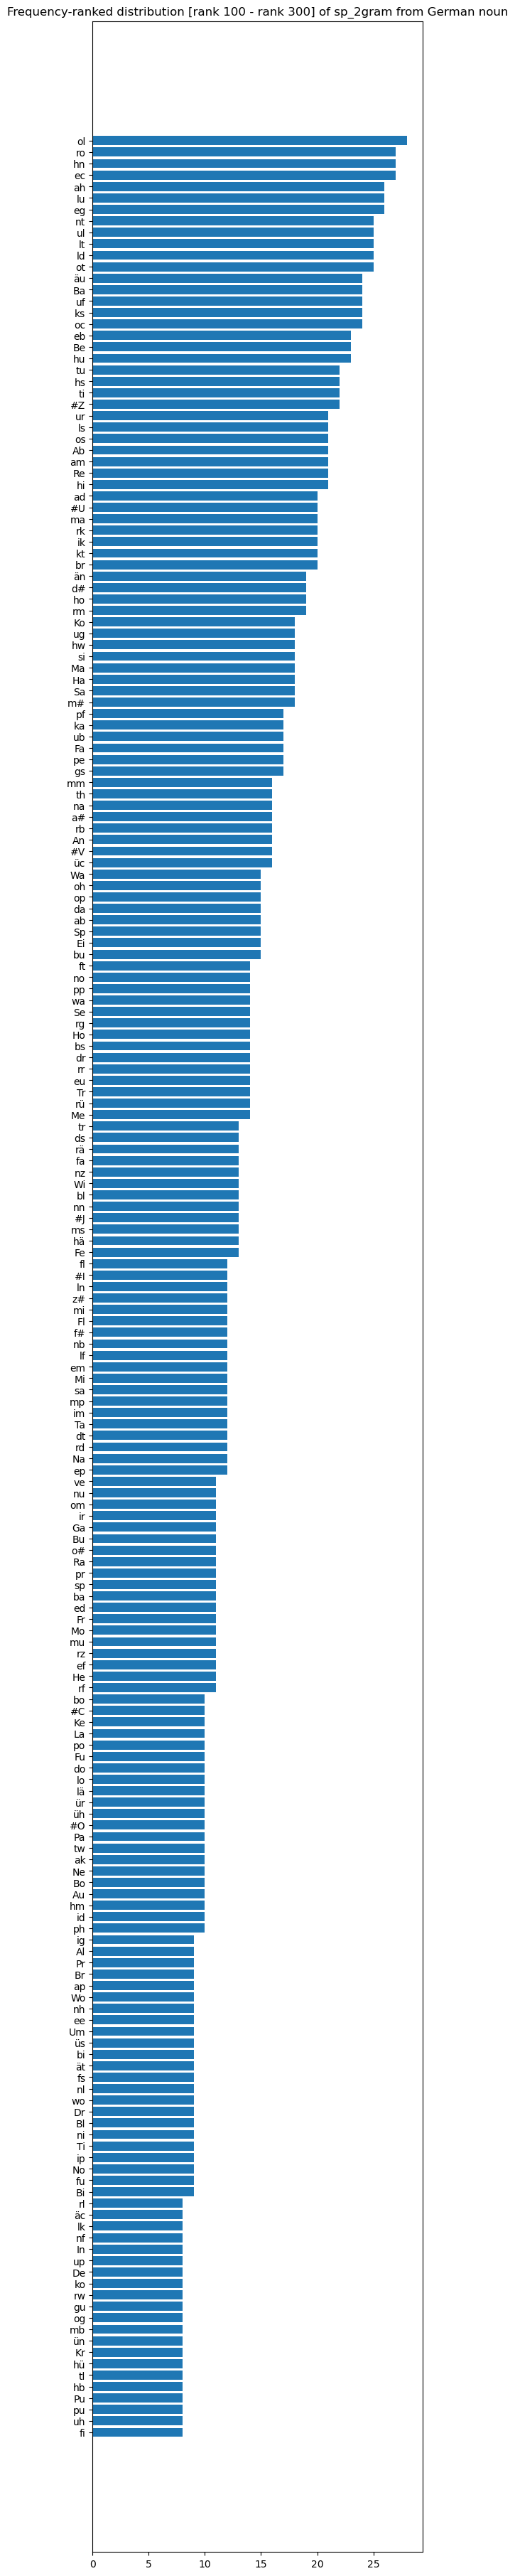

In [118]:
## frequency-ranked view
skippy = False
prefix = "sp_"
n_local = 2
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [119]:
## spell 3grams
add_ngram_to_df(df, n_for_ngram = 3, prefix = "sp_", skippy = False, inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_3gram
min_size: 1
supplement_var: sp_2gram
89977    [#Zi, Zie, ier, erf, rfi, fis, isc, sch, che, ...
35395    [#He, Hec, eck, cke, ken, en#, #H, He, ec, ck,...
51101    [#Me, Mes, ess, ssb, sbr, brü, rüc, ück, cke, ...
11932    [#Bi, Bit, itt, ttb, tbr, bri, rie, ief, efe, ...
83406    [#Vi, Vis, isu, sum, um#, #V, Vi, is, su, um, ...
                               ...                        
53759    [#Na, Nac, ach, cht, htr, trä, räg, äge, ge#, ...
11985    [#Bl, Blä, lät, ätt, ttc, tch, che, hen, en#, ...
85121    [#Wä, Wäl, äll, lle, le#, #W, Wä, äl, ll, le, ...
86442    [#We, Wei, ein, ins, nst, sto, toc, ock, ck#, ...
67458    [#Sc, Sch, chu, hur, urw, rwo, wol, oll, lle, ...
Name: sp_3gram, Length: 1245, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


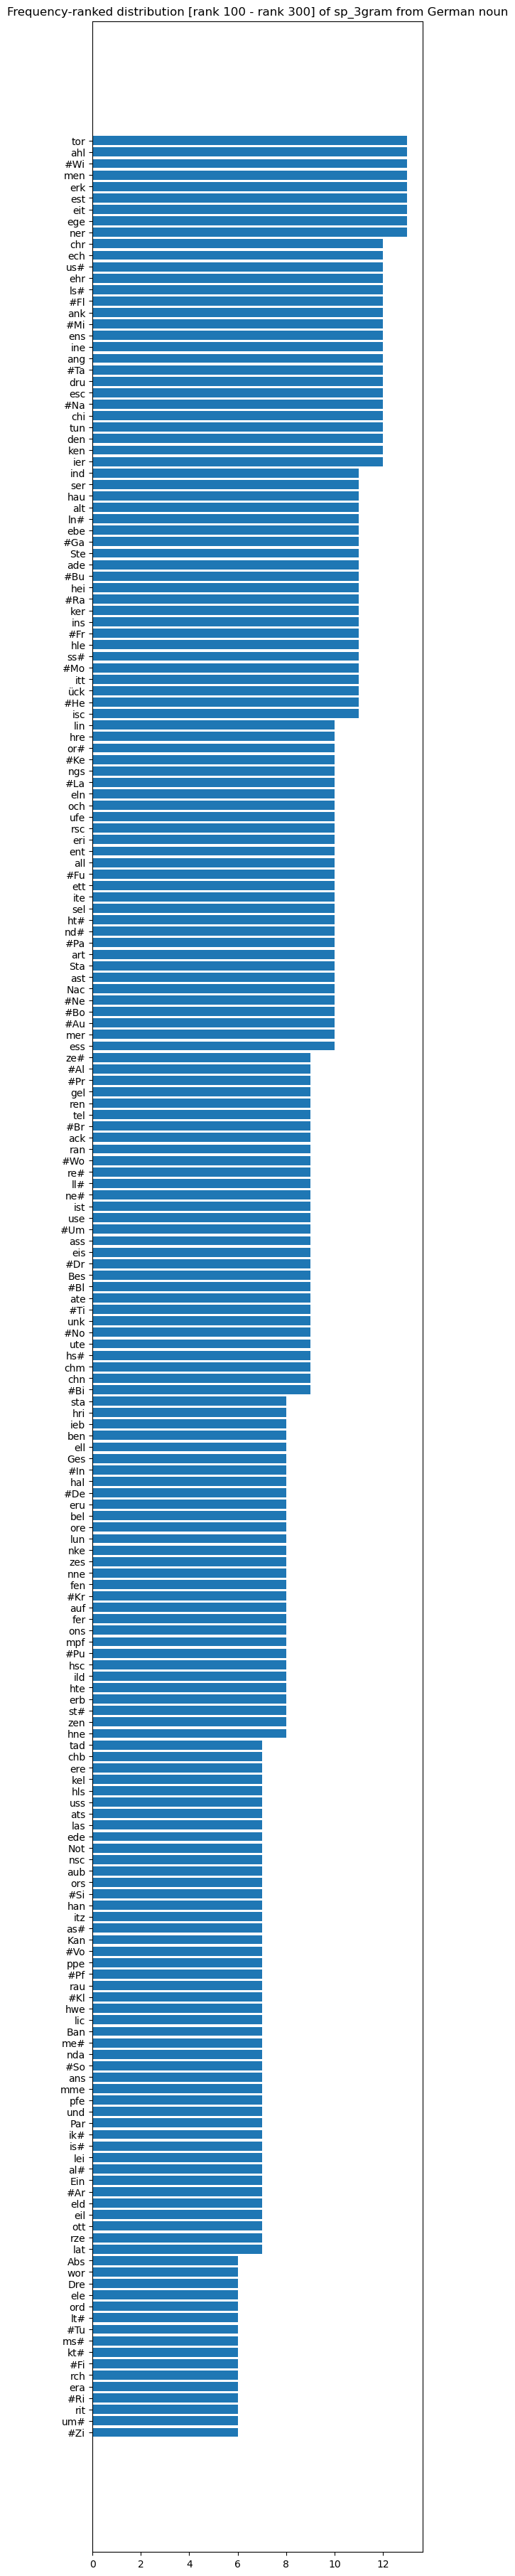

In [120]:
## frequency-ranke view
skippy = False
prefix = "sp_"
n_local = 3
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [121]:
## spell 4grams
add_ngram_to_df(df, n_for_ngram = 4, prefix = "sp_", skippy = False, inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_4gram
min_size: 1
supplement_var: sp_3gram
89977    [#Zie, Zier, ierf, erfi, rfis, fisc, isch, sch...
35395    [#Hec, Heck, ecke, cken, ken#, #He, Hec, eck, ...
51101    [#Mes, Mess, essb, ssbr, sbrü, brüc, rück, ück...
11932    [#Bit, Bitt, ittb, ttbr, tbri, brie, rief, ief...
83406    [#Vis, Visu, isum, sum#, #Vi, Vis, isu, sum, u...
                               ...                        
53759    [#Nac, Nach, acht, chtr, hträ, träg, räge, äge...
11985    [#Blä, Blät, lätt, ättc, ttch, tche, chen, hen...
85121    [#Wäl, Wäll, älle, lle#, #Wä, Wäl, äll, lle, l...
86442    [#Wei, Wein, eins, inst, nsto, stoc, tock, ock...
67458    [#Sch, Schu, chur, hurw, urwo, rwol, woll, oll...
Name: sp_4gram, Length: 1245, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


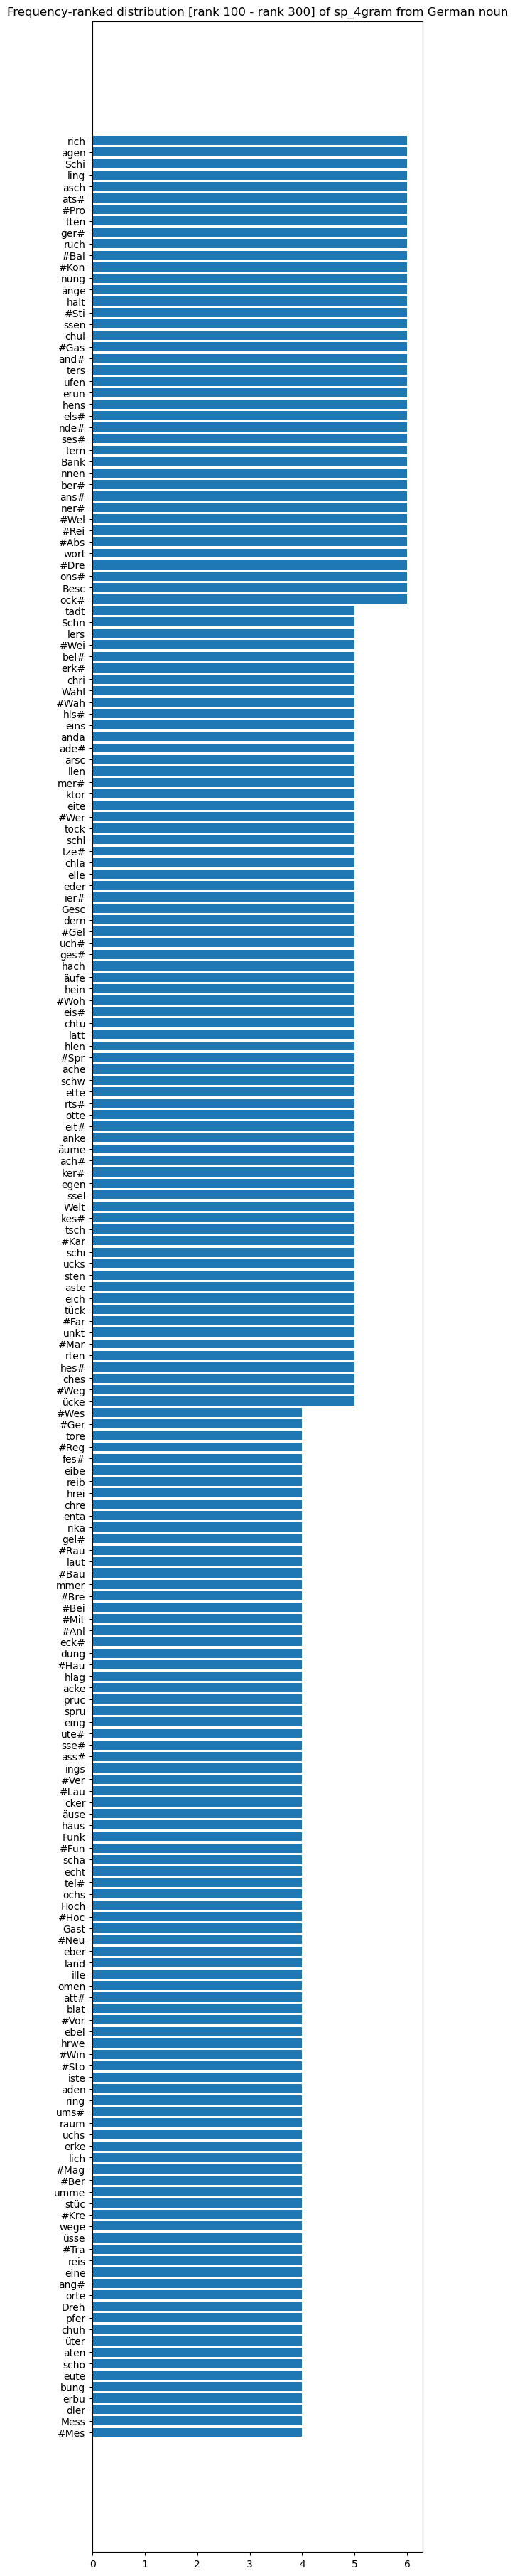

In [122]:
## frequency-ranke view
skippy = False
prefix = "sp_"
n_local = 4
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [123]:
## spell 5grams
add_ngram_to_df(df, n_for_ngram = 5, prefix = "sp_", skippy = False, inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_5gram
min_size: 1
supplement_var: sp_4gram
89977    [#Zier, Zierf, ierfi, erfis, rfisc, fisch, isc...
35395    [#Heck, Hecke, ecken, cken#, #Hec, Heck, ecke,...
51101    [#Mess, Messb, essbr, ssbrü, sbrüc, brück, rüc...
11932    [#Bitt, Bittb, ittbr, ttbri, tbrie, brief, rie...
83406    [#Visu, Visum, isum#, #Vis, Visu, isum, sum#, ...
                               ...                        
53759    [#Nach, Nacht, achtr, chträ, hträg, träge, räg...
11985    [#Blät, Blätt, lättc, ättch, ttche, tchen, che...
85121    [#Wäll, Wälle, älle#, #Wäl, Wäll, älle, lle#, ...
86442    [#Wein, Weins, einst, insto, nstoc, stock, toc...
67458    [#Schu, Schur, churw, hurwo, urwol, rwoll, wol...
Name: sp_5gram, Length: 1245, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


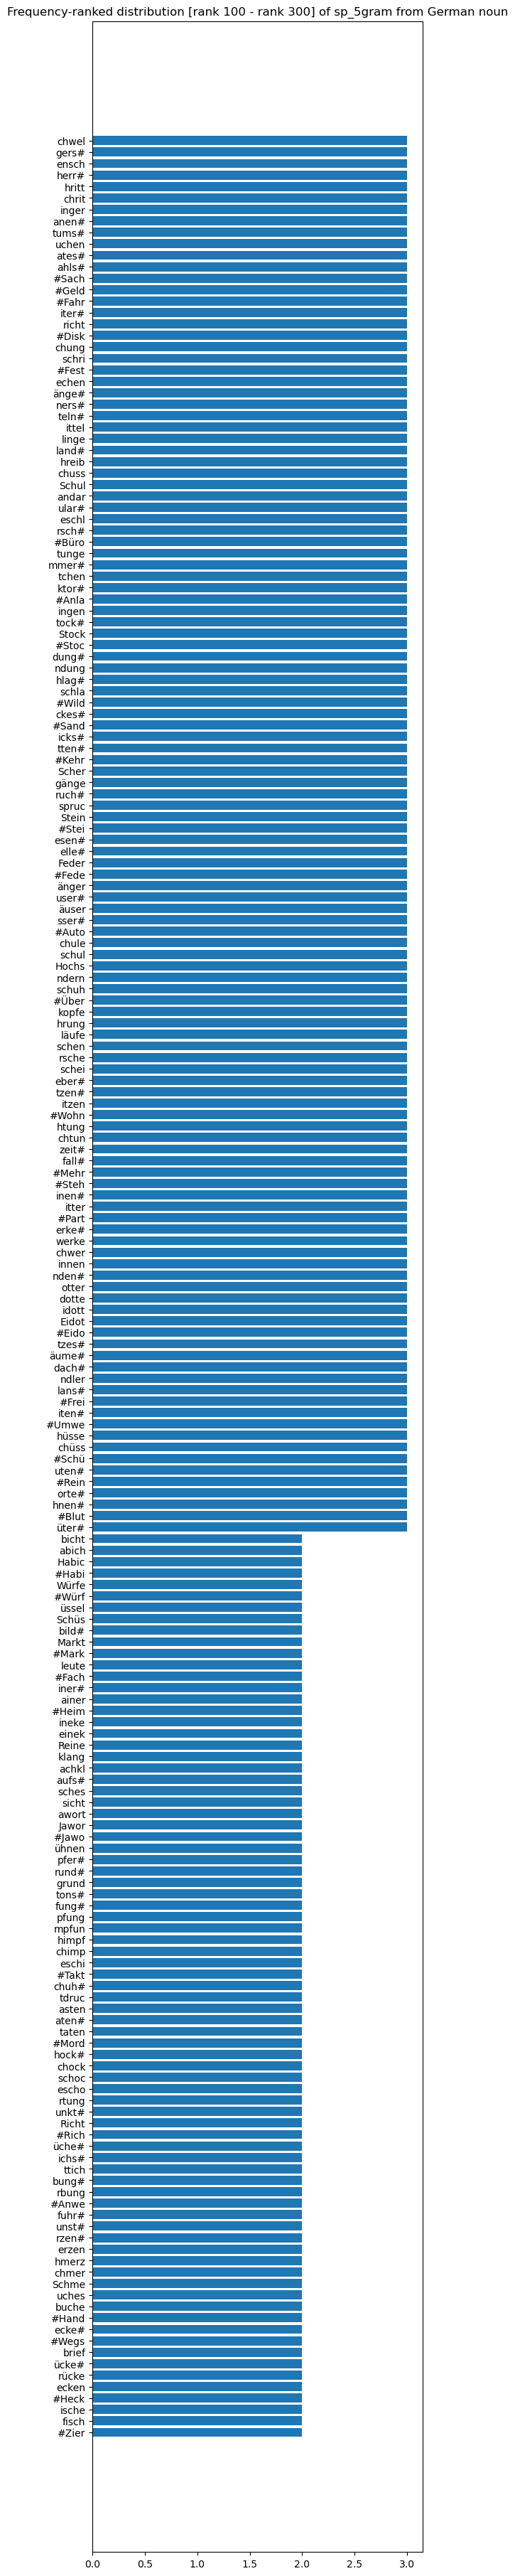

In [124]:
## frequency-ranke view
skippy = False
prefix = "sp_"
n_local = 5
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [125]:
## spell skippy 2grams
add_ngram_to_df(df, n_for_ngram = 2, prefix = "sp_", skippy = True, inclusive = ngram_is_inclusive, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_skippy2gram
min_size: 1
supplement_var: sp_1gram
89977    [#Z, #…i, #…e, #…r, #…f, #…i, #…s, #…c, #…h, #...
35395    [#H, #…e, #…c, #…k, #…e, #…n, #…#, He, H…c, H…...
51101    [#M, #…e, #…s, #…s, #…b, #…r, #…ü, #…c, #…k, #...
11932    [#B, #…i, #…t, #…t, #…b, #…r, #…i, #…e, #…f, #...
83406    [#V, #…i, #…s, #…u, #…m, #…#, Vi, V…s, V…u, V…...
                               ...                        
53759    [#N, #…a, #…c, #…h, #…t, #…r, #…ä, #…g, #…e, #...
11985    [#B, #…l, #…ä, #…t, #…t, #…c, #…h, #…e, #…n, #...
85121    [#W, #…ä, #…l, #…l, #…e, #…#, Wä, W…l, W…l, W…...
86442    [#W, #…e, #…i, #…n, #…s, #…t, #…o, #…c, #…k, #...
67458    [#S, #…c, #…h, #…u, #…r, #…w, #…o, #…l, #…l, #...
Name: sp_skippy2gram, Length: 1245, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


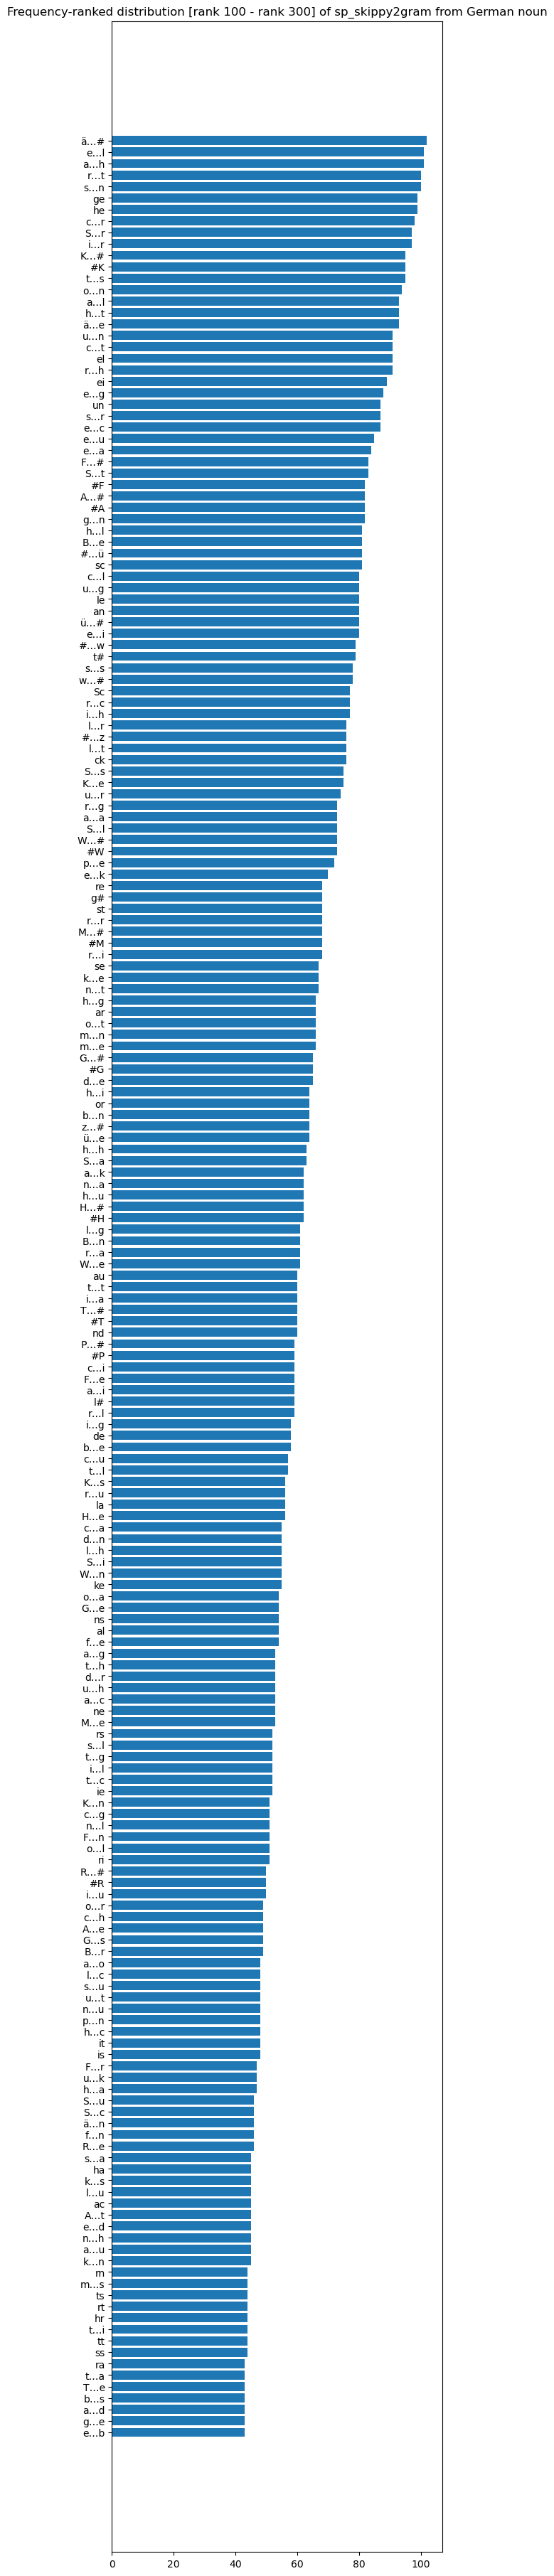

In [126]:
## frequency-ranked view
skippy = True
prefix = "sp_"
n_local = 2
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [127]:
## spell skippy 3grams
add_ngram_to_df(df, n_for_ngram = 3, prefix = "sp_", skippy = True, inclusive = ngram_is_inclusive, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_skippy3gram
min_size: 1
supplement_var: sp_skippy2gram
89977    [#Zi, #Z…e, #Z…r, #Z…f, #Z…i, #Z…s, #Z…c, #Z…h...
35395    [#He, #H…c, #H…k, #H…e, #H…n, #H…#, #…ec, #…e…...
51101    [#Me, #M…s, #M…s, #M…b, #M…r, #M…ü, #M…c, #M…k...
11932    [#Bi, #B…t, #B…t, #B…b, #B…r, #B…i, #B…e, #B…f...
83406    [#Vi, #V…s, #V…u, #V…m, #V…#, #…is, #…i…u, #…i...
                               ...                        
53759    [#Na, #N…c, #N…h, #N…t, #N…r, #N…ä, #N…g, #N…e...
11985    [#Bl, #B…ä, #B…t, #B…t, #B…c, #B…h, #B…e, #B…n...
85121    [#Wä, #W…l, #W…l, #W…e, #W…#, #…äl, #…ä…l, #…ä...
86442    [#We, #W…i, #W…n, #W…s, #W…t, #W…o, #W…c, #W…k...
67458    [#Sc, #S…h, #S…u, #S…r, #S…w, #S…o, #S…l, #S…l...
Name: sp_skippy3gram, Length: 1245, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


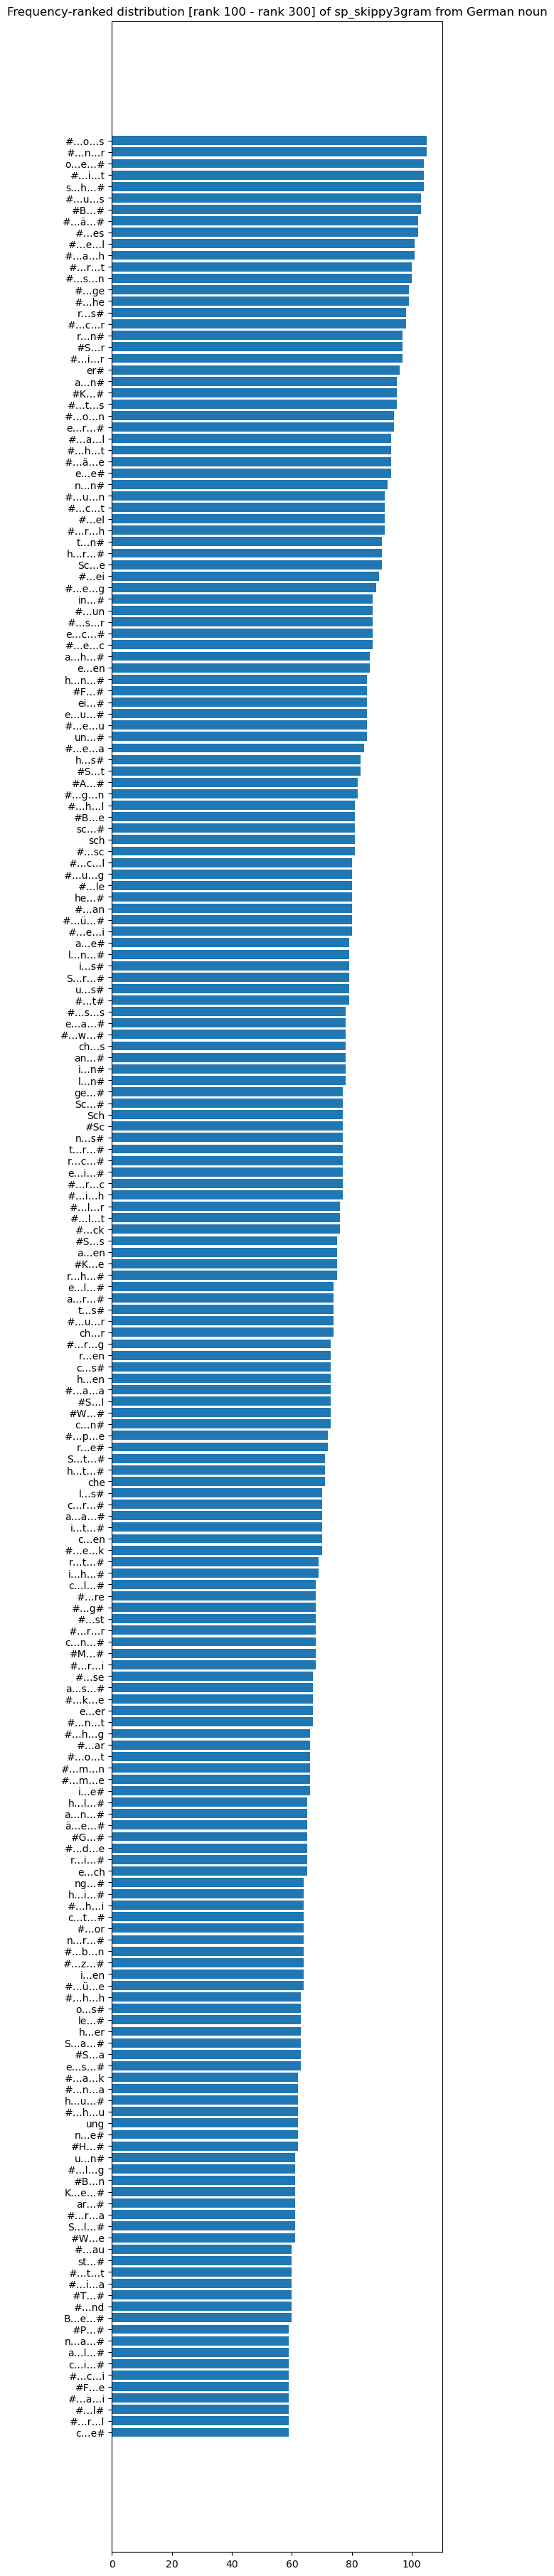

In [128]:
## frequency-ranked view
skippy = True
prefix = "sp_"
n_local = 3
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [129]:
## spell skippy 4grams
add_ngram_to_df(df, n_for_ngram = 4, prefix = "sp_", skippy = True, inclusive = ngram_is_inclusive, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_skippy4gram
min_size: 1
supplement_var: sp_skippy3gram
89977    [#Zie, #Zi…r, #Zi…f, #Zi…i, #Zi…s, #Zi…c, #Zi…...
35395    [#Hec, #He…k, #He…e, #He…n, #He…#, #H…ck, #H…c...
51101    [#Mes, #Me…s, #Me…b, #Me…r, #Me…ü, #Me…c, #Me…...
11932    [#Bit, #Bi…t, #Bi…b, #Bi…r, #Bi…i, #Bi…e, #Bi…...
83406    [#Vis, #Vi…u, #Vi…m, #Vi…#, #V…su, #V…s…m, #V…...
                               ...                        
53759    [#Nac, #Na…h, #Na…t, #Na…r, #Na…ä, #Na…g, #Na…...
11985    [#Blä, #Bl…t, #Bl…t, #Bl…c, #Bl…h, #Bl…e, #Bl…...
85121    [#Wäl, #Wä…l, #Wä…e, #Wä…#, #W…ll, #W…l…e, #W…...
86442    [#Wei, #We…n, #We…s, #We…t, #We…o, #We…c, #We…...
67458    [#Sch, #Sc…u, #Sc…r, #Sc…w, #Sc…o, #Sc…l, #Sc…...
Name: sp_skippy4gram, Length: 1245, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


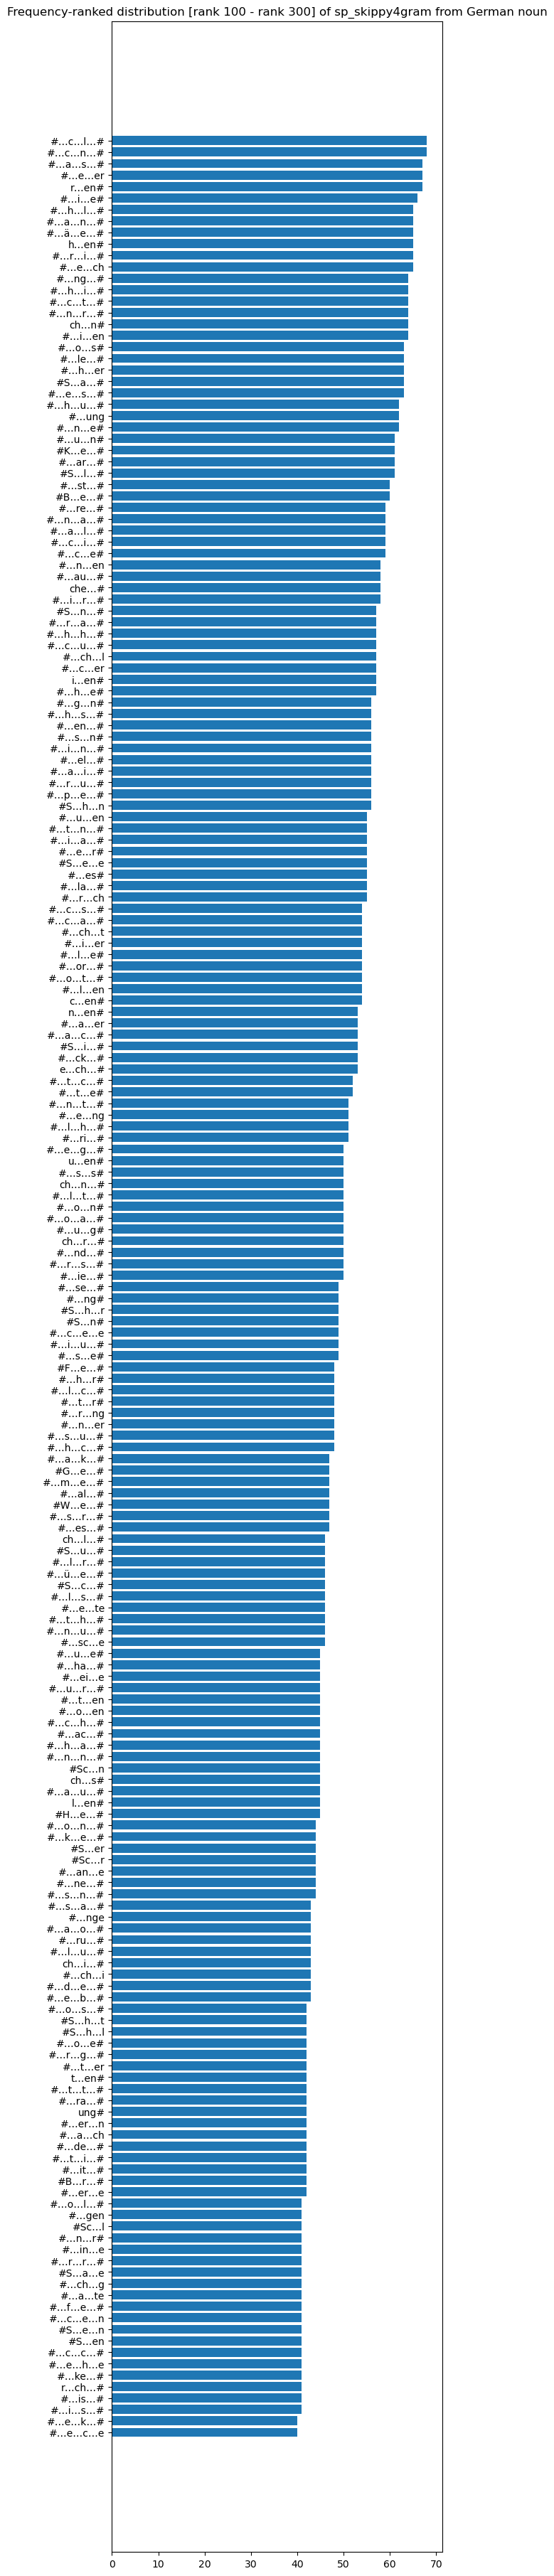

In [130]:
## frequency-ranked view
skippy = True
prefix = "sp_"
n_local = 4
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [131]:
## spell skippy 5grams
add_ngram_to_df(df, n_for_ngram = 5, prefix = "sp_", skippy = True, inclusive = ngram_is_inclusive, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_skippy5gram
min_size: 1
supplement_var: sp_skippy4gram
89977    [#Zier, #Zie…f, #Zie…i, #Zie…s, #Zie…c, #Zie…h...
35395    [#Heck, #Hec…e, #Hec…n, #Hec…#, #He…ke, #He…k…...
51101    [#Mess, #Mes…b, #Mes…r, #Mes…ü, #Mes…c, #Mes…k...
11932    [#Bitt, #Bit…b, #Bit…r, #Bit…i, #Bit…e, #Bit…f...
83406    [#Visu, #Vis…m, #Vis…#, #Vi…um, #Vi…u…#, #Vi…m...
                               ...                        
53759    [#Nach, #Nac…t, #Nac…r, #Nac…ä, #Nac…g, #Nac…e...
11985    [#Blät, #Blä…t, #Blä…c, #Blä…h, #Blä…e, #Blä…n...
85121    [#Wäll, #Wäl…e, #Wäl…#, #Wä…le, #Wä…l…#, #Wä…e...
86442    [#Wein, #Wei…s, #Wei…t, #Wei…o, #Wei…c, #Wei…k...
67458    [#Schu, #Sch…r, #Sch…w, #Sch…o, #Sch…l, #Sch…l...
Name: sp_skippy5gram, Length: 1245, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


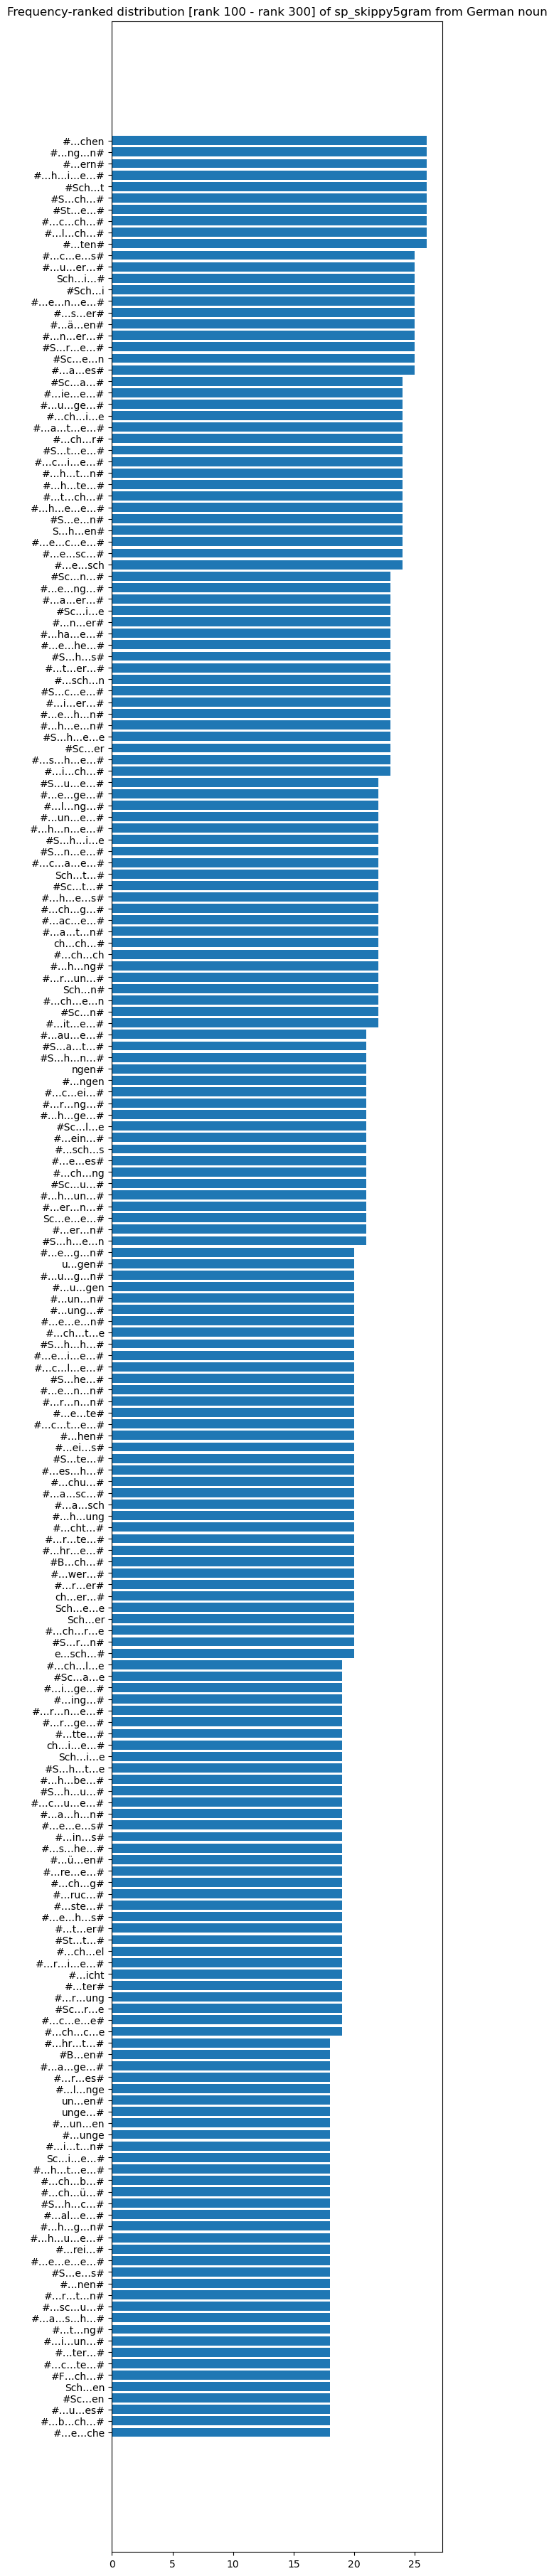

In [132]:
## frequency-ranked view
skippy = True
prefix = "sp_"
n_local = 5
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

# Sound

In [133]:
## sound 2grams
add_ngram_to_df(df, n_for_ngram = 2, skippy = False, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_2gram
min_size: 1
supplement_var: sn_1gram
89977    [#t, ts, si, iː, ːɾ, ɾf, fɪ, ɪʃ, ʃə, ə#, #, t,...
35395        [#h, hɛ, ɛk, kə, ən, n#, #, h, ɛ, k, ə, n, #]
51101    [#m, mɛ, ɛs, sz, zb, br, rʏ, ʏk, kə, ə#, #, m,...
11932    [#b, bɪ, ɪt, tb, br, ri, iː, ːf, fə, ə#, #, b,...
83406    [#v, vi, iː, ːz, zu, um, m#, #, v, i, ː, z, u,...
                               ...                        
53759    [#n, na, ax, xt, tɾ, ɾɛ, ɛː, ːg, gə, ə#, #, n,...
11985    [#b, bl, lɛ, ɛt, tç, çn, n̩, ̩#, #, b, l, ɛ, t...
85121               [#v, vɛ, ɛl, lə, ə#, #, v, ɛ, l, ə, #]
86442    [#v, va, ae, en, ns, st, tɔ, ɔk, k#, #, v, a, ...
67458    [#ʃ, ʃʊ, ʊɾ, ɾv, vɔ, ɔl, ll, lə, ə#, #, ʃ, ʊ, ...
Name: sn_2gram, Length: 1245, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


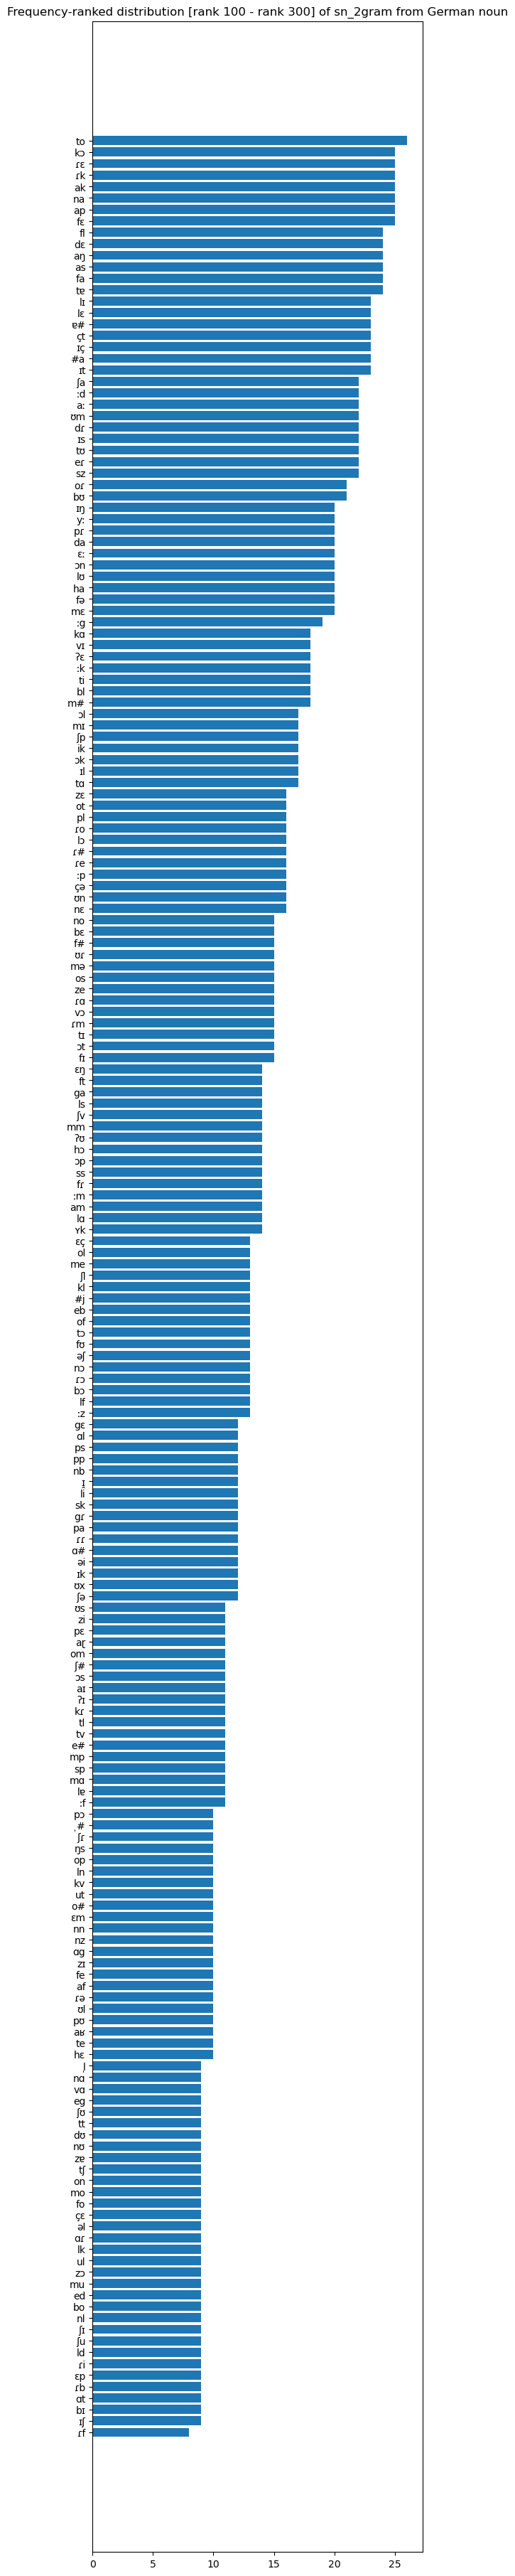

In [134]:
## frequency-ranked view
skippy = False
prefix = "sn_"
n_local = 2
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [135]:
## sound 3grams
add_ngram_to_df(df, n_for_ngram = 3, skippy = False, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_3gram
min_size: 1
supplement_var: sn_2gram
89977    [#ts, tsi, siː, iːɾ, ːɾf, ɾfɪ, fɪʃ, ɪʃə, ʃə#, ...
35395    [#hɛ, hɛk, ɛkə, kən, ən#, #h, hɛ, ɛk, kə, ən, ...
51101    [#mɛ, mɛs, ɛsz, szb, zbr, brʏ, rʏk, ʏkə, kə#, ...
11932    [#bɪ, bɪt, ɪtb, tbr, bri, riː, iːf, ːfə, fə#, ...
83406    [#vi, viː, iːz, ːzu, zum, um#, #v, vi, iː, ːz,...
                               ...                        
53759    [#na, nax, axt, xtɾ, tɾɛ, ɾɛː, ɛːg, ːgə, gə#, ...
11985    [#bl, blɛ, lɛt, ɛtç, tçn, çn̩, n̩#, #b, bl, lɛ...
85121    [#vɛ, vɛl, ɛlə, lə#, #v, vɛ, ɛl, lə, ə#, #, v,...
86442    [#va, vae, aen, ens, nst, stɔ, tɔk, ɔk#, #v, v...
67458    [#ʃʊ, ʃʊɾ, ʊɾv, ɾvɔ, vɔl, ɔll, llə, lə#, #ʃ, ʃ...
Name: sn_3gram, Length: 1245, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


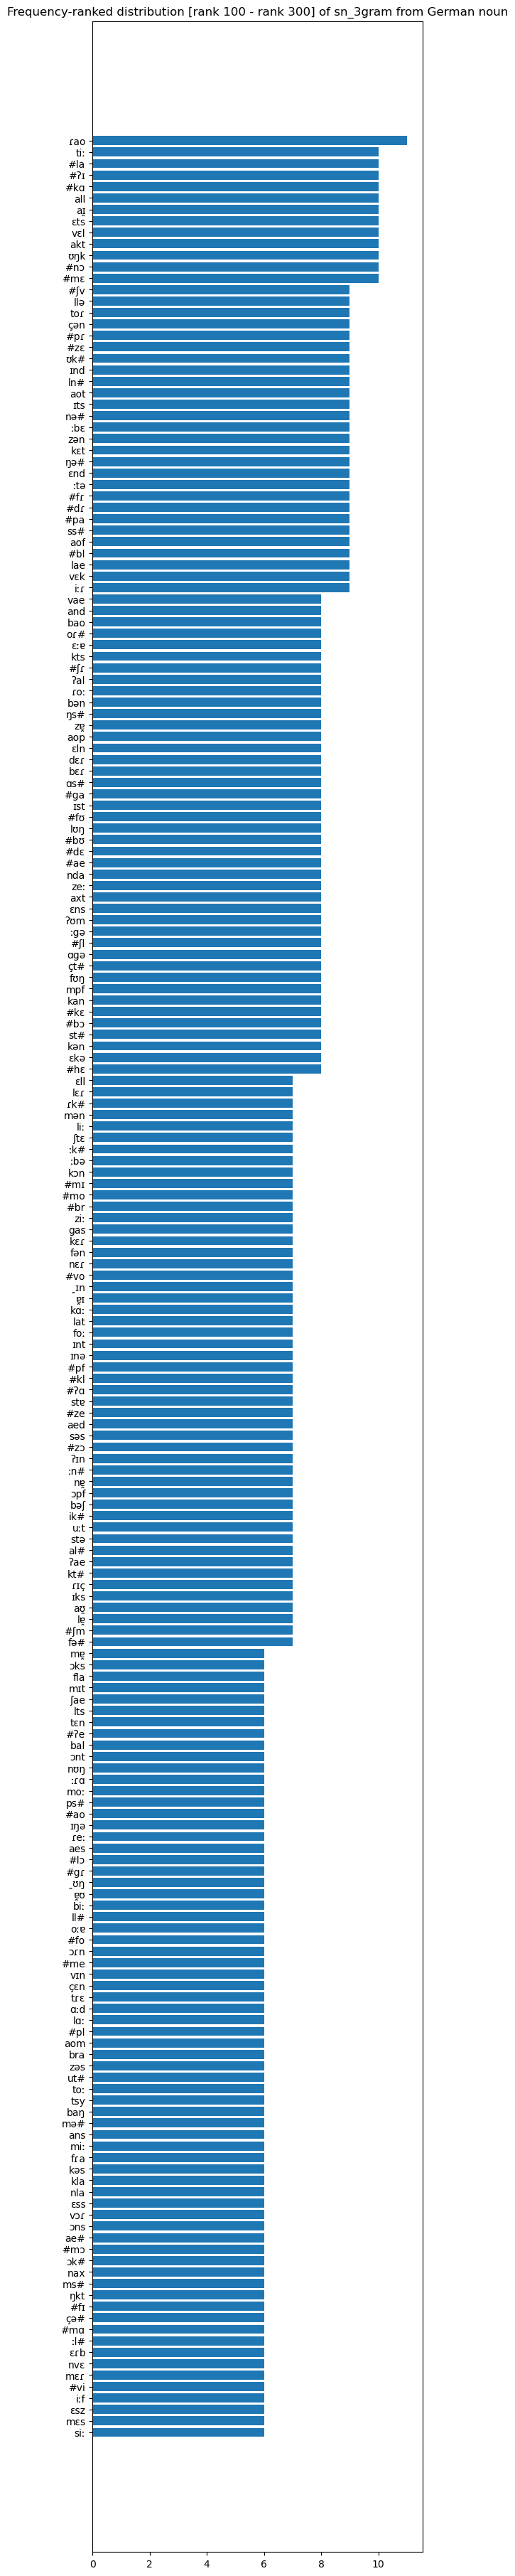

In [136]:
## frequency-ranked view
skippy = False
prefix = "sn_"
n_local = 3
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [137]:
## sound 4grams
add_ngram_to_df(df, n_for_ngram = 4, skippy = False, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_4gram
min_size: 1
supplement_var: sn_3gram
89977    [#tsi, tsiː, siːɾ, iːɾf, ːɾfɪ, ɾfɪʃ, fɪʃə, ɪʃə...
35395    [#hɛk, hɛkə, ɛkən, kən#, #hɛ, hɛk, ɛkə, kən, ə...
51101    [#mɛs, mɛsz, ɛszb, szbr, zbrʏ, brʏk, rʏkə, ʏkə...
11932    [#bɪt, bɪtb, ɪtbr, tbri, briː, riːf, iːfə, ːfə...
83406    [#viː, viːz, iːzu, ːzum, zum#, #vi, viː, iːz, ...
                               ...                        
53759    [#nax, naxt, axtɾ, xtɾɛ, tɾɛː, ɾɛːg, ɛːgə, ːgə...
11985    [#blɛ, blɛt, lɛtç, ɛtçn, tçn̩, çn̩#, #bl, blɛ,...
85121    [#vɛl, vɛlə, ɛlə#, #vɛ, vɛl, ɛlə, lə#, #v, vɛ,...
86442    [#vae, vaen, aens, enst, nstɔ, stɔk, tɔk#, #va...
67458    [#ʃʊɾ, ʃʊɾv, ʊɾvɔ, ɾvɔl, vɔll, ɔllə, llə#, #ʃʊ...
Name: sn_4gram, Length: 1245, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


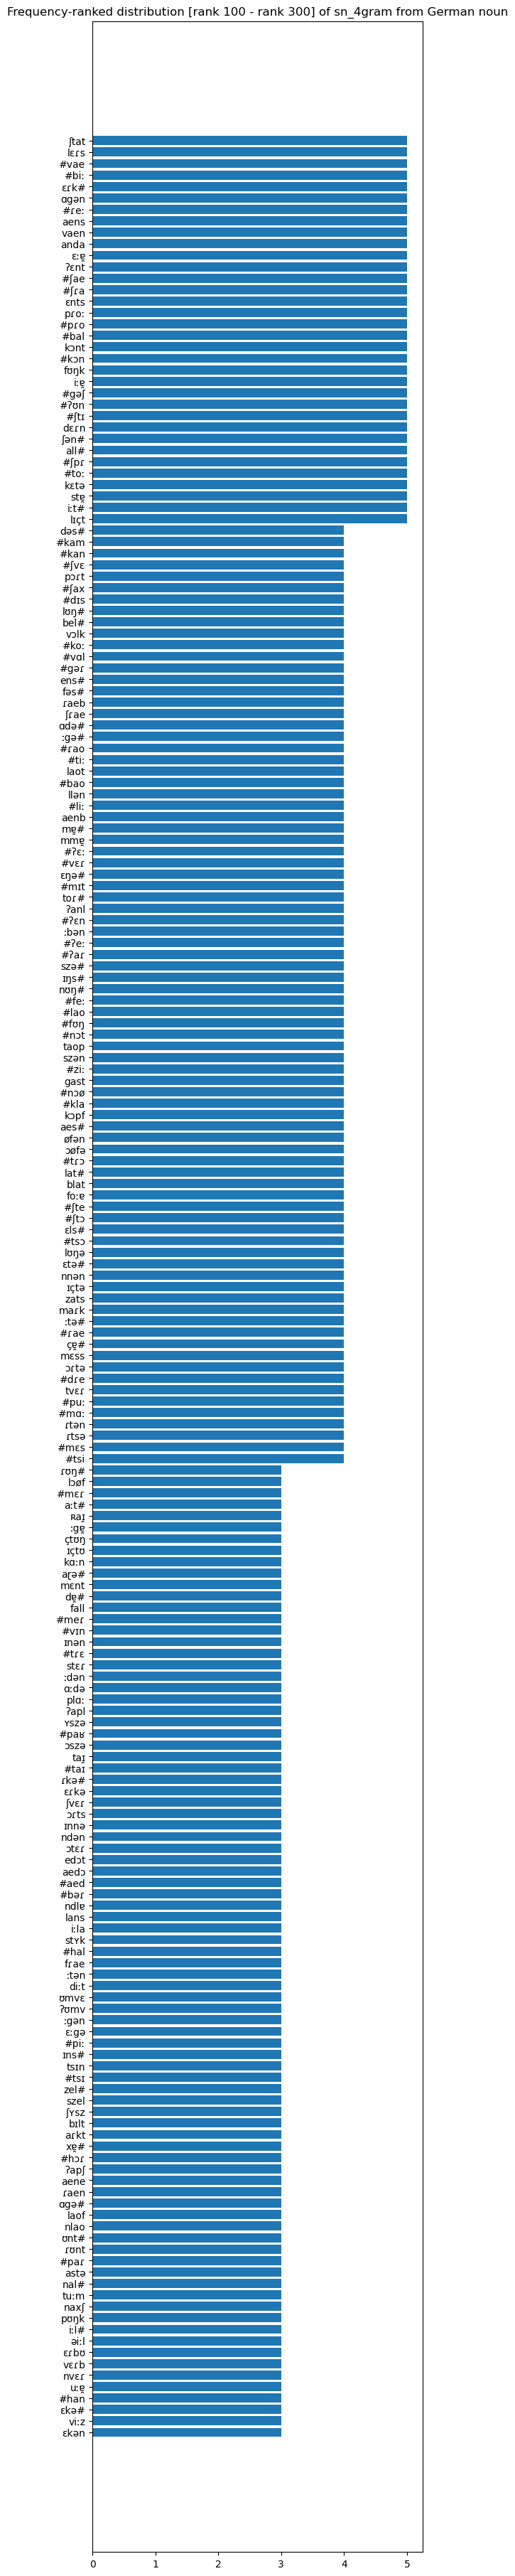

In [138]:
## frequency-ranked view
skippy = False
prefix = "sn_"
n_local = 4
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [139]:
## sound 5grams
add_ngram_to_df(df, n_for_ngram = 5, skippy = False, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_5gram
min_size: 1
supplement_var: sn_4gram
89977    [#tsiː, tsiːɾ, siːɾf, iːɾfɪ, ːɾfɪʃ, ɾfɪʃə, fɪʃ...
35395    [#hɛkə, hɛkən, ɛkən#, #hɛk, hɛkə, ɛkən, kən#, ...
51101    [#mɛsz, mɛszb, ɛszbr, szbrʏ, zbrʏk, brʏkə, rʏk...
11932    [#bɪtb, bɪtbr, ɪtbri, tbriː, briːf, riːfə, iːf...
83406    [#viːz, viːzu, iːzum, ːzum#, #viː, viːz, iːzu,...
                               ...                        
53759    [#naxt, naxtɾ, axtɾɛ, xtɾɛː, tɾɛːg, ɾɛːgə, ɛːg...
11985    [#blɛt, blɛtç, lɛtçn, ɛtçn̩, tçn̩#, #blɛ, blɛt...
85121    [#vɛlə, vɛlə#, #vɛl, vɛlə, ɛlə#, #vɛ, vɛl, ɛlə...
86442    [#vaen, vaens, aenst, enstɔ, nstɔk, stɔk#, #va...
67458    [#ʃʊɾv, ʃʊɾvɔ, ʊɾvɔl, ɾvɔll, vɔllə, ɔllə#, #ʃʊ...
Name: sn_5gram, Length: 1245, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


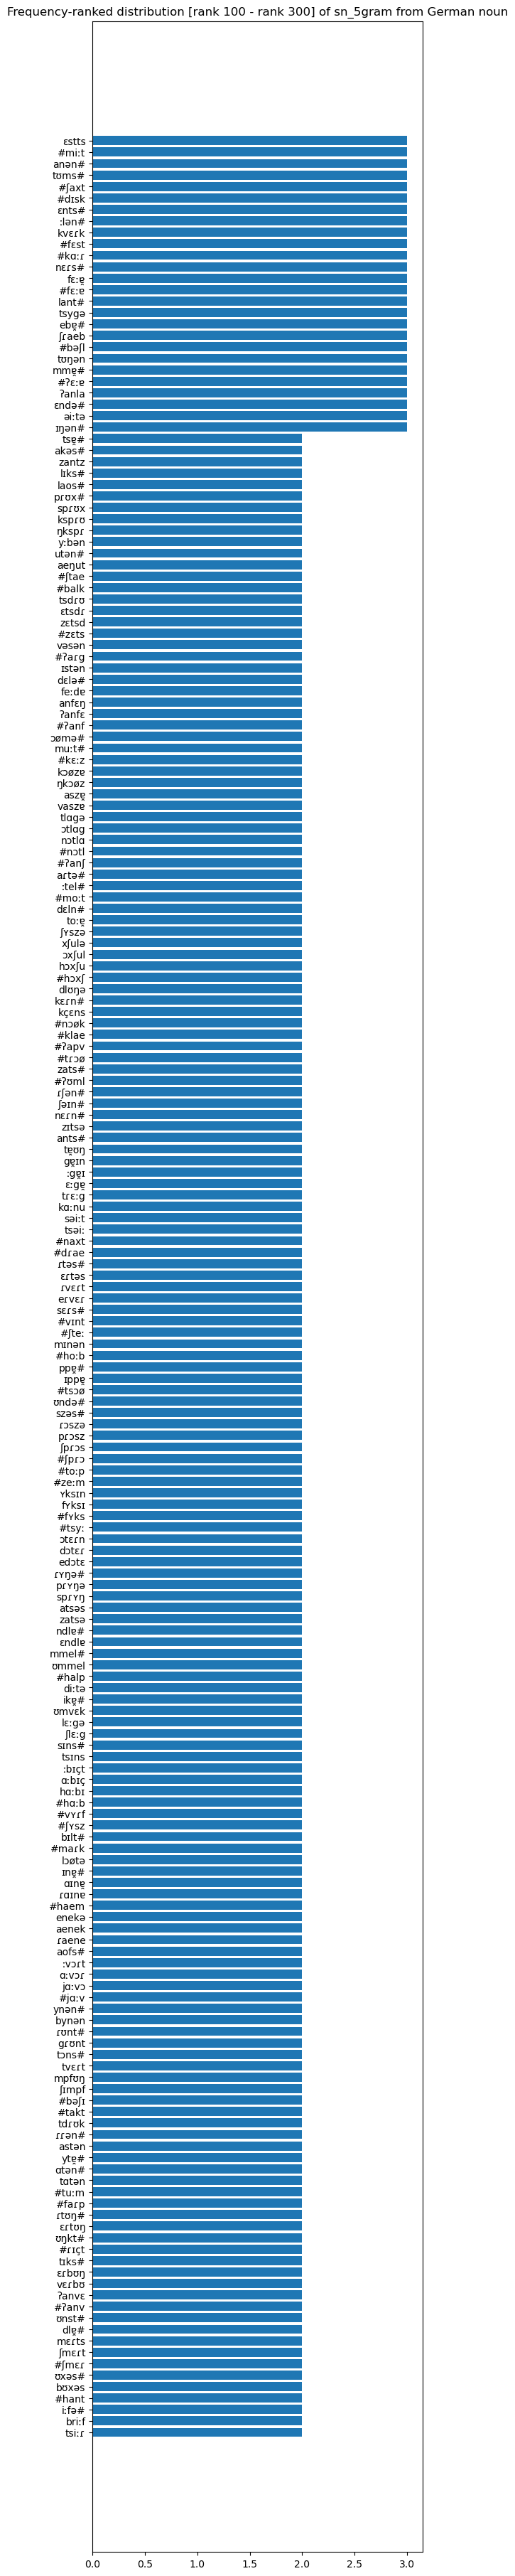

In [140]:
## frequency-ranked view
skippy = False
prefix = "sn_"
n_local = 5
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [141]:
## sound skippy 2grams
add_ngram_to_df(df, n_for_ngram = 2, skippy = True, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_skippy2gram
min_size: 1
supplement_var: sn_1gram
89977    [#t, #…s, #…i, #…ː, #…ɾ, #…f, #…ɪ, #…ʃ, #…ə, #...
35395    [#h, #…ɛ, #…k, #…ə, #…n, #…#, hɛ, h…k, h…ə, h…...
51101    [#m, #…ɛ, #…s, #…z, #…b, #…r, #…ʏ, #…k, #…ə, #...
11932    [#b, #…ɪ, #…t, #…b, #…r, #…i, #…ː, #…f, #…ə, #...
83406    [#v, #…i, #…ː, #…z, #…u, #…m, #…#, vi, v…ː, v…...
                               ...                        
53759    [#n, #…a, #…x, #…t, #…ɾ, #…ɛ, #…ː, #…g, #…ə, #...
11985    [#b, #…l, #…ɛ, #…t, #…ç, #…n, #…̩, #…#, bl, b…...
85121    [#v, #…ɛ, #…l, #…ə, #…#, vɛ, v…l, v…ə, v…#, ɛl...
86442    [#v, #…a, #…e, #…n, #…s, #…t, #…ɔ, #…k, #…#, v...
67458    [#ʃ, #…ʊ, #…ɾ, #…v, #…ɔ, #…l, #…l, #…ə, #…#, ʃ...
Name: sn_skippy2gram, Length: 1245, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


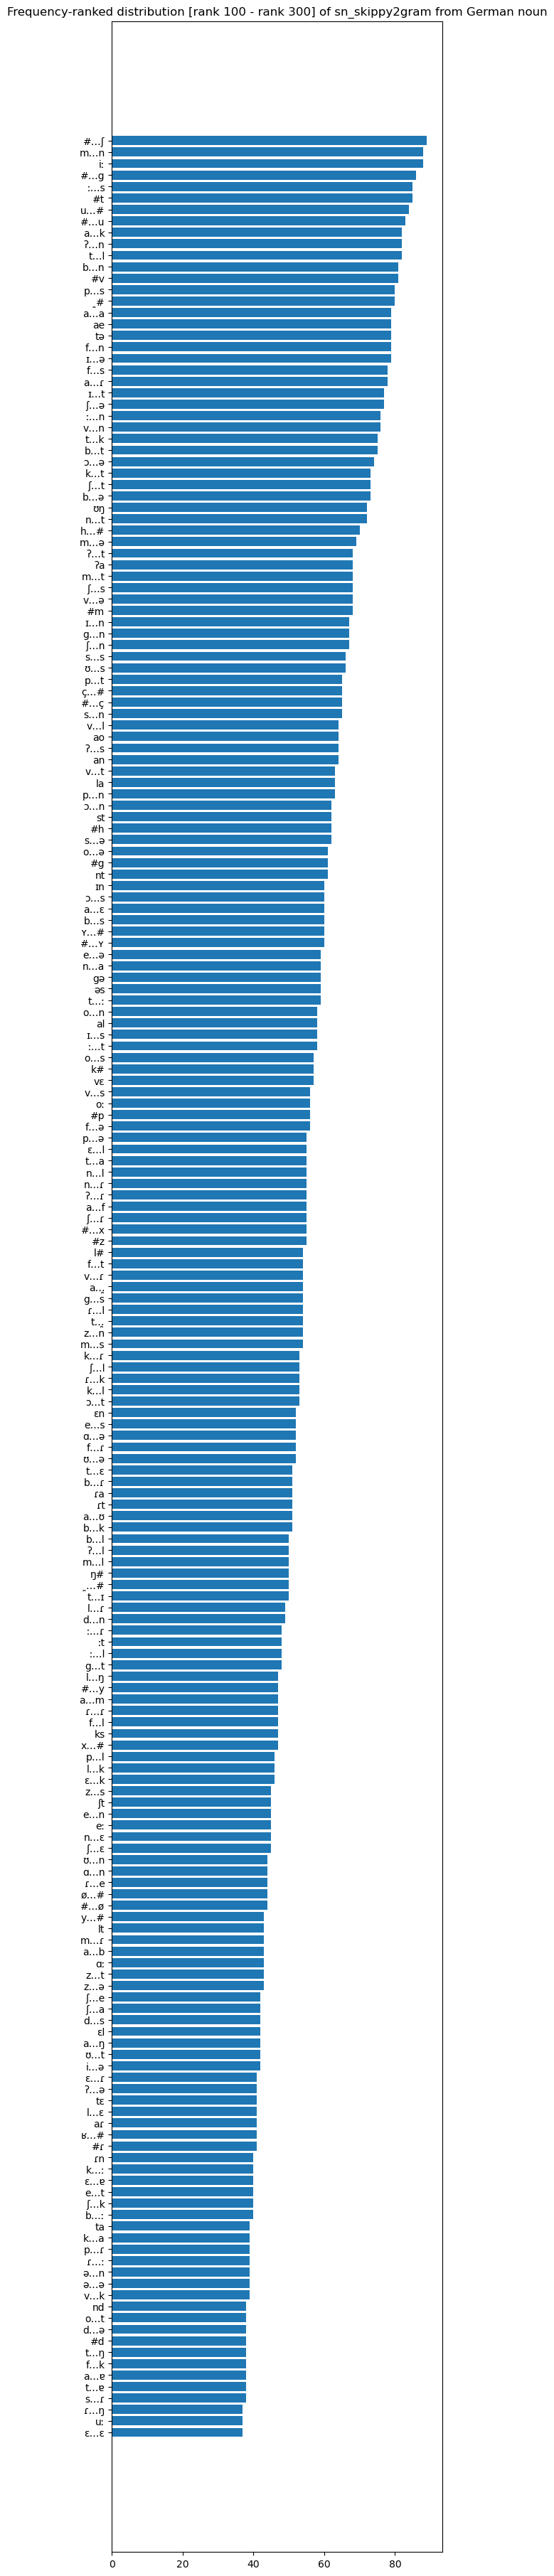

In [142]:
## frequency-ranked view
skippy = True
prefix = "sn_"
n_local = 2
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [143]:
## sound skippy 3grams
add_ngram_to_df(df, n_for_ngram = 3, skippy = True, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_skippy3gram
min_size: 1
supplement_var: sn_skippy2gram
89977    [#ts, #t…i, #t…ː, #t…ɾ, #t…f, #t…ɪ, #t…ʃ, #t…ə...
35395    [#hɛ, #h…k, #h…ə, #h…n, #h…#, #…ɛk, #…ɛ…ə, #…ɛ...
51101    [#mɛ, #m…s, #m…z, #m…b, #m…r, #m…ʏ, #m…k, #m…ə...
11932    [#bɪ, #b…t, #b…b, #b…r, #b…i, #b…ː, #b…f, #b…ə...
83406    [#vi, #v…ː, #v…z, #v…u, #v…m, #v…#, #…iː, #…i…...
                               ...                        
53759    [#na, #n…x, #n…t, #n…ɾ, #n…ɛ, #n…ː, #n…g, #n…ə...
11985    [#bl, #b…ɛ, #b…t, #b…ç, #b…n, #b…̩, #b…#, #…lɛ...
85121    [#vɛ, #v…l, #v…ə, #v…#, #…ɛl, #…ɛ…ə, #…ɛ…#, #…...
86442    [#va, #v…e, #v…n, #v…s, #v…t, #v…ɔ, #v…k, #v…#...
67458    [#ʃʊ, #ʃ…ɾ, #ʃ…v, #ʃ…ɔ, #ʃ…l, #ʃ…l, #ʃ…ə, #ʃ…#...
Name: sn_skippy3gram, Length: 1245, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


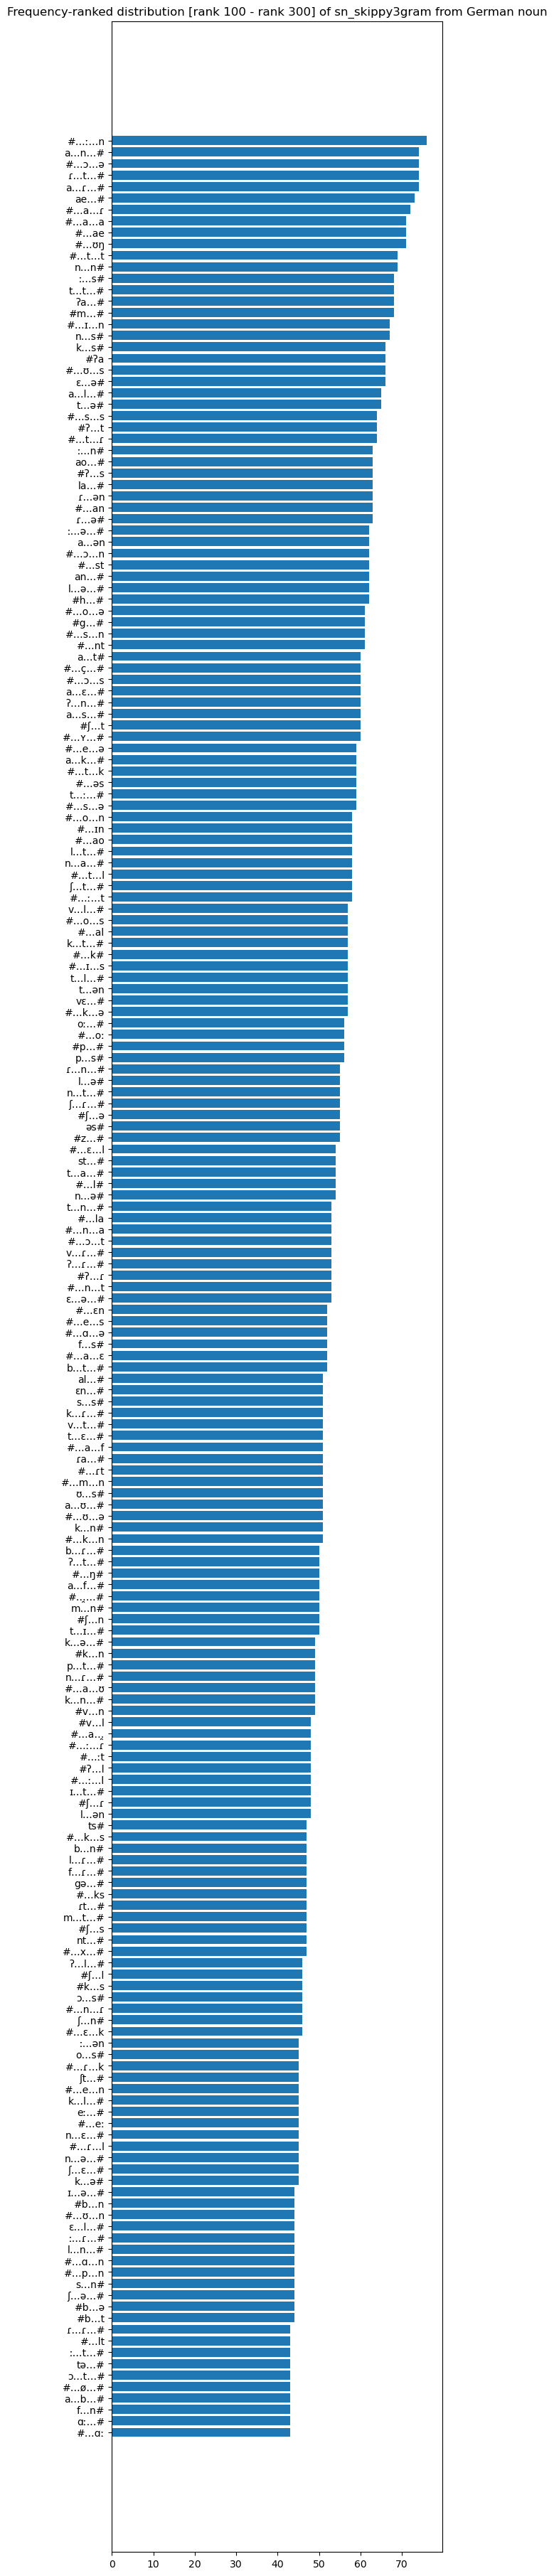

In [144]:
## frequency-ranked view
skippy = True
prefix = "sn_"
n_local = 3
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [145]:
## sound skippy 4grams
add_ngram_to_df(df, n_for_ngram = 4, prefix = "sn_", skippy = True, inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_skippy4gram
min_size: 1
supplement_var: sn_skippy3gram
89977    [#tsi, #ts…ː, #ts…ɾ, #ts…f, #ts…ɪ, #ts…ʃ, #ts…...
35395    [#hɛk, #hɛ…ə, #hɛ…n, #hɛ…#, #h…kə, #h…k…n, #h…...
51101    [#mɛs, #mɛ…z, #mɛ…b, #mɛ…r, #mɛ…ʏ, #mɛ…k, #mɛ…...
11932    [#bɪt, #bɪ…b, #bɪ…r, #bɪ…i, #bɪ…ː, #bɪ…f, #bɪ…...
83406    [#viː, #vi…z, #vi…u, #vi…m, #vi…#, #v…ːz, #v…ː...
                               ...                        
53759    [#nax, #na…t, #na…ɾ, #na…ɛ, #na…ː, #na…g, #na…...
11985    [#blɛ, #bl…t, #bl…ç, #bl…n, #bl…̩, #bl…#, #b…ɛ...
85121    [#vɛl, #vɛ…ə, #vɛ…#, #v…lə, #v…l…#, #v…ə#, #…ɛ...
86442    [#vae, #va…n, #va…s, #va…t, #va…ɔ, #va…k, #va…...
67458    [#ʃʊɾ, #ʃʊ…v, #ʃʊ…ɔ, #ʃʊ…l, #ʃʊ…l, #ʃʊ…ə, #ʃʊ…...
Name: sn_skippy4gram, Length: 1245, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


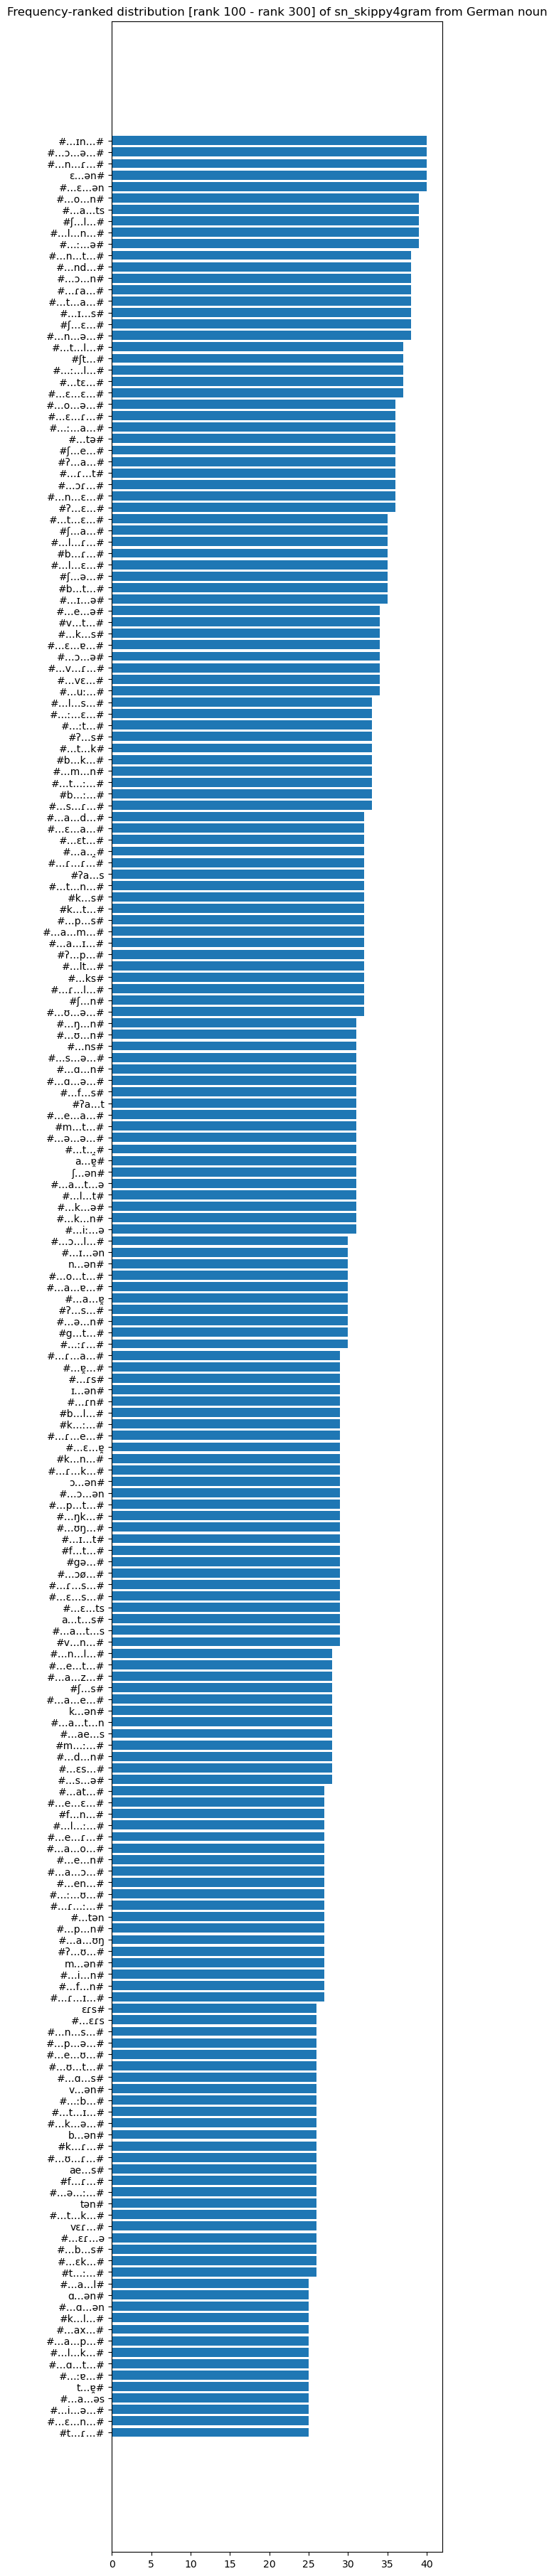

In [146]:
## frequency-ranked view
skippy = True
prefix = "sn_"
n_local = 4
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [147]:
## sound skippy 5grams
add_ngram_to_df(df, n_for_ngram = 5, skippy = True, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_skippy5gram
min_size: 1
supplement_var: sn_skippy4gram
89977    [#tsiː, #tsi…ɾ, #tsi…f, #tsi…ɪ, #tsi…ʃ, #tsi…ə...
35395    [#hɛkə, #hɛk…n, #hɛk…#, #hɛ…ən, #hɛ…ə…#, #hɛ…n...
51101    [#mɛsz, #mɛs…b, #mɛs…r, #mɛs…ʏ, #mɛs…k, #mɛs…ə...
11932    [#bɪtb, #bɪt…r, #bɪt…i, #bɪt…ː, #bɪt…f, #bɪt…ə...
83406    [#viːz, #viː…u, #viː…m, #viː…#, #vi…zu, #vi…z…...
                               ...                        
53759    [#naxt, #nax…ɾ, #nax…ɛ, #nax…ː, #nax…g, #nax…ə...
11985    [#blɛt, #blɛ…ç, #blɛ…n, #blɛ…̩, #blɛ…#, #bl…tç...
85121    [#vɛlə, #vɛl…#, #vɛ…ə#, #v…lə#, #…ɛlə#, vɛlə#,...
86442    [#vaen, #vae…s, #vae…t, #vae…ɔ, #vae…k, #vae…#...
67458    [#ʃʊɾv, #ʃʊɾ…ɔ, #ʃʊɾ…l, #ʃʊɾ…l, #ʃʊɾ…ə, #ʃʊɾ…#...
Name: sn_skippy5gram, Length: 1245, dtype: object


/var/folders/7s/_syxn0dd45lcngw4yl2kywd40000gn/T/ipykernel_4021/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


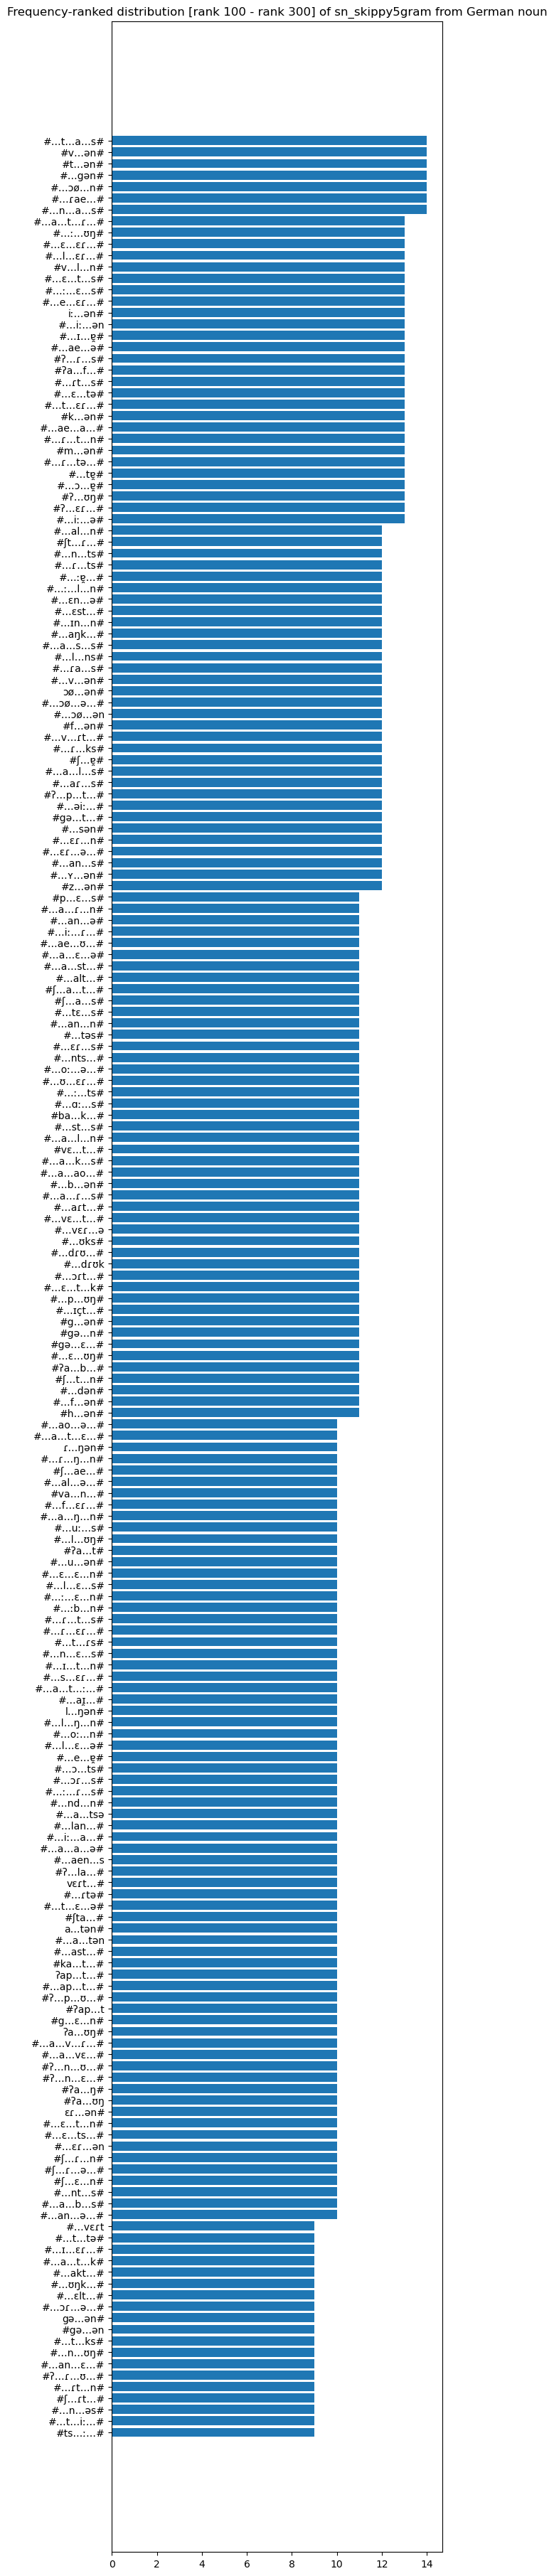

In [148]:
## frequency-ranked view
skippy = True
prefix = "sn_"
n_local = 5
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)